In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
#importing train data
df_train = pd.read_csv('/Users/pavankalyankarri/Desktop/Guvi/Project 4/train_data.csv',index_col = 0)
df_train.head()

,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
year,,,,,,,,,,,,,
2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [5]:
#importing test data
df_test = pd.read_csv('/Users/pavankalyankarri/Desktop/Guvi/Project 4/test_data.csv',index_col = 0)
df_test.head()

,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
year,,,,,,,,,,,,,
2008,4,22,4,29,5279,4,P48,9,4,2,33,2,3
2008,5,19,1,29,10059,1,A15,14,5,2,33,2,1
2008,4,11,10,29,2919,4,P23,6,2,2,28,2,2
2008,4,28,3,27,6304,2,B24,11,2,1,57,1,2
2008,5,26,1,29,11266,1,A2,3,1,1,43,2,1


In [7]:
# Step 2 - Basic data check

print("Train Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)

# Data types and non-null info
print("\nTrain Data Info:")
print(df_train.info())

# Missing values
print("\nMissing Values in Train Data:")
print(df_train.isnull().sum())

# Unique values per column (for categorical understanding)
print("\nUnique values in Train Data:")
for col in df_train.columns:
    print(f"{col}: {df_train[col].nunique()}")

# First few rows of Train Data
print("\nSample rows from Train Data:")
print(df_train.head())

Train Data Shape: (132379, 13)
Test Data Shape: (33095, 13)

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 132379 entries, 2008 to 2008
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   month                 132379 non-null  int64 
 1   day                   132379 non-null  int64 
 2   order                 132379 non-null  int64 
 3   country               132379 non-null  int64 
 4   session_id            132379 non-null  int64 
 5   page1_main_category   132379 non-null  int64 
 6   page2_clothing_model  132379 non-null  object
 7   colour                132379 non-null  int64 
 8   location              132379 non-null  int64 
 9   model_photography     132379 non-null  int64 
 10  price                 132379 non-null  int64 
 11  price_2               132379 non-null  int64 
 12  page                  132379 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 14.1+ M

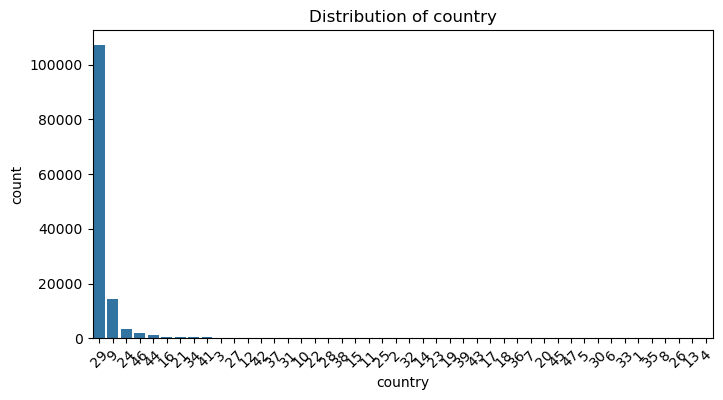

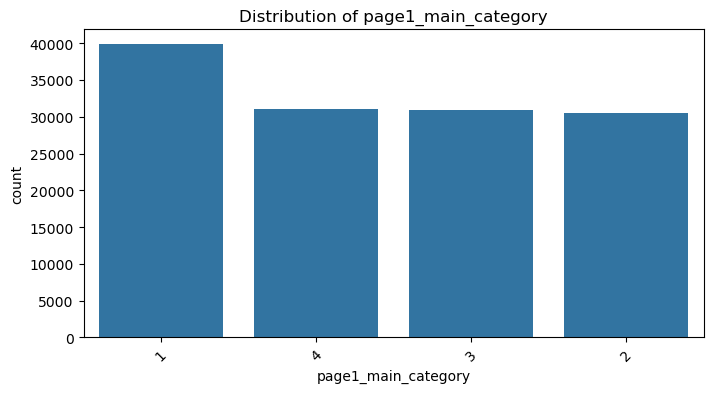

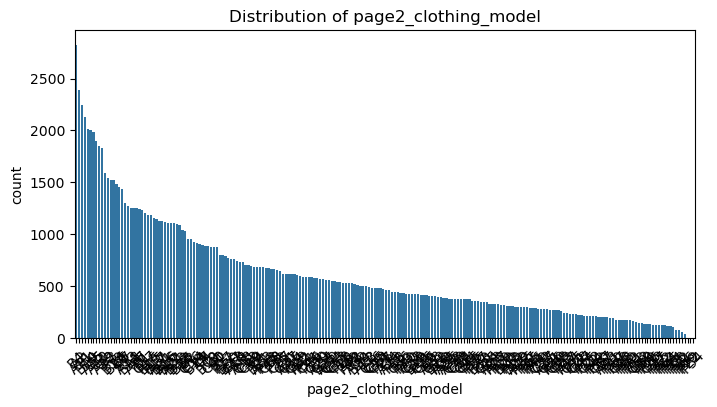

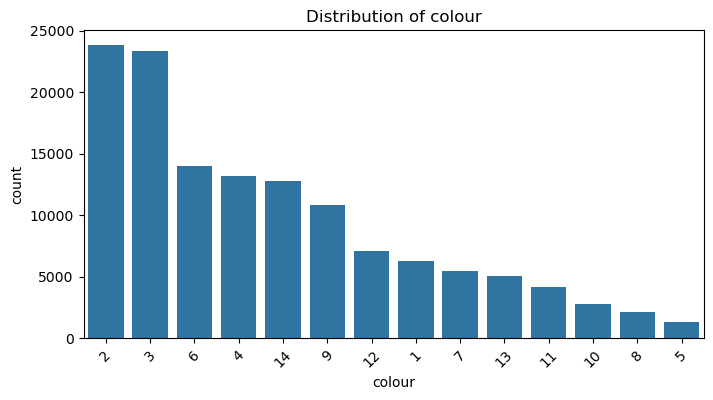

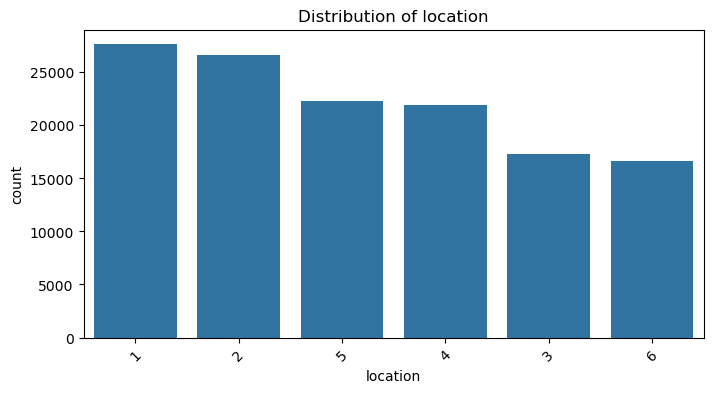

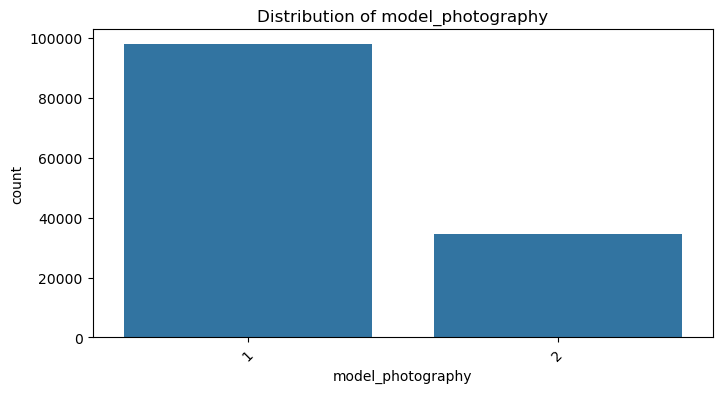

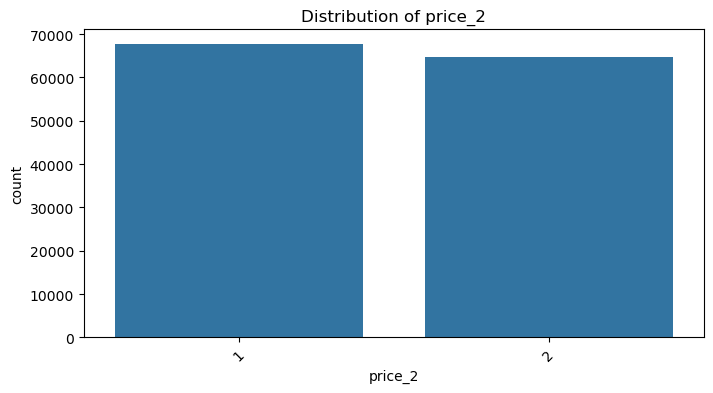

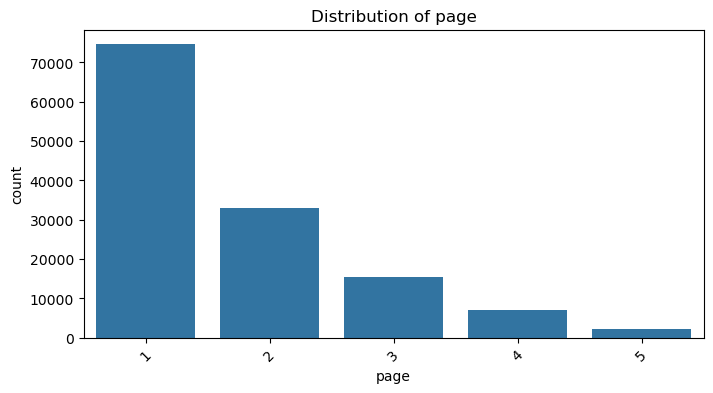

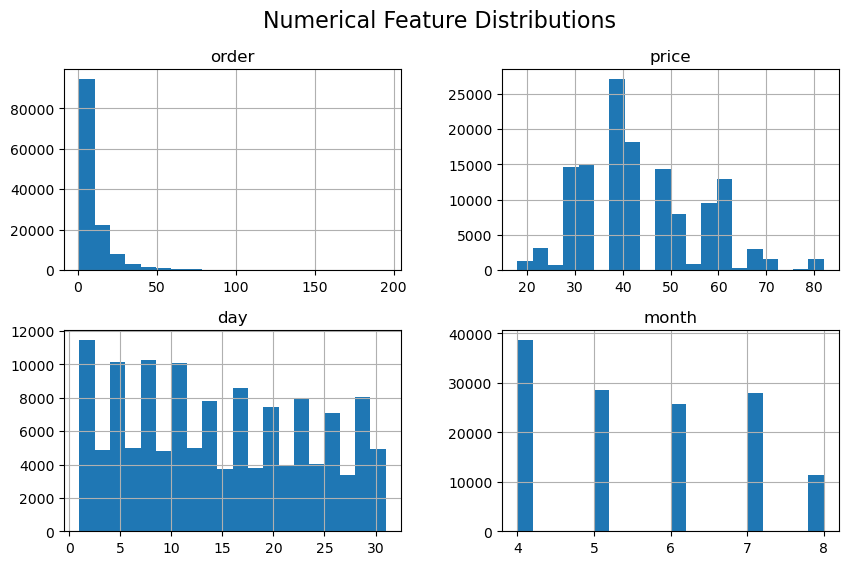

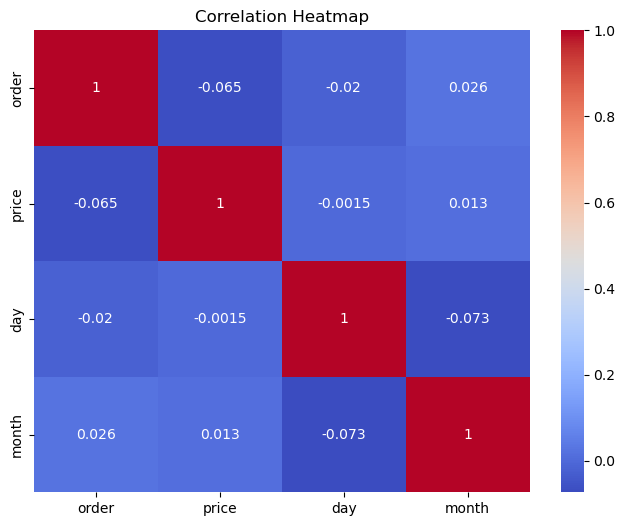

In [9]:
# Step 3 - Exploratory Data Analysis

# Distribution of categorical features
categorical_cols = ['country','page1_main_category','page2_clothing_model',
                    'colour','location','model_photography','price_2','page']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Numerical distributions
numerical_cols = ['order','price','day','month']
df_train[numerical_cols].hist(figsize=(10,6), bins=20)
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap for numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(df_train[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Step 2b - Preprocessing Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Columns
numerical_cols = ['order','price','day','month']
categorical_cols = ['country','page1_main_category','page2_clothing_model',
                    'colour','location','model_photography','price_2']

# Preprocessing transformers
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])


In [13]:
# Step 2c - Fit and transform train data, transform test data

# Drop identifier column
X_train = df_train.drop(['session_id','page'], axis=1)  # drop session_id; page may be target
y_train = df_train['page']  # Assuming 'page' is our target for classification

X_test = df_test.drop(['session_id','page'], axis=1)
y_test = df_test['page']  # Assuming same target structure

# Fit preprocessor on train and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed Train Shape:", X_train_processed.shape)
print("Processed Test Shape:", X_test_processed.shape)


Processed Train Shape: (132379, 294)
Processed Test Shape: (33095, 294)


In [15]:
# Step 3 - Baseline Classification Model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
clf = LogisticRegression(max_iter=500, class_weight='balanced', n_jobs=-1)

# Fit model
clf.fit(X_train_processed, y_train)

# Predictions
y_pred = clf.predict(X_test_processed)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9999697839552802

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     18815
           2       1.00      1.00      1.00      8155
           3       1.00      1.00      1.00      3831
           4       1.00      1.00      1.00      1751
           5       1.00      1.00      1.00       543

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095


Confusion Matrix:
 [[18815     0     0     0     0]
 [    0  8154     0     1     0]
 [    0     0  3831     0     0]
 [    0     0     0  1751     0]
 [    0     0     0     0   543]]


In [17]:
# Step 4 - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)

# Fit model
rf_clf.fit(X_train_processed, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test_processed)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9999697839552802

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     18815
           2       1.00      1.00      1.00      8155
           3       1.00      1.00      1.00      3831
           4       1.00      1.00      1.00      1751
           5       1.00      1.00      1.00       543

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095


Confusion Matrix:
 [[18815     0     0     0     0]
 [    0  8154     0     1     0]
 [    0     0  3831     0     0]
 [    0     0     0  1751     0]
 [    0     0     0     0   543]]


In [19]:
# Step 1: Create synthetic revenue target
# Assume a conversion probability per session (from page number or order)
# For simplicity, revenue = price * conversion likelihood (0/1)
# Since we don't have conversion, we can use page number as proxy weight

df_train['revenue'] = df_train['price'] * (df_train['page']/df_train['page'].max())
df_test['revenue']  = df_test['price']  * (df_test['page']/df_test['page'].max())

y_train_reg = df_train['revenue']
y_test_reg  = df_test['revenue']


In [21]:
# Step 2 - Linear Regression for Revenue Estimation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train
reg = LinearRegression()
reg.fit(X_train_processed, y_train_reg)

# Predict
y_pred_reg = reg.predict(X_test_processed)

# Evaluation
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
mae  = mean_absolute_error(y_test_reg, y_pred_reg)
r2   = r2_score(y_test_reg, y_pred_reg)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.2f}")


RMSE: 0.02
MAE : 0.00
R²  : 1.00


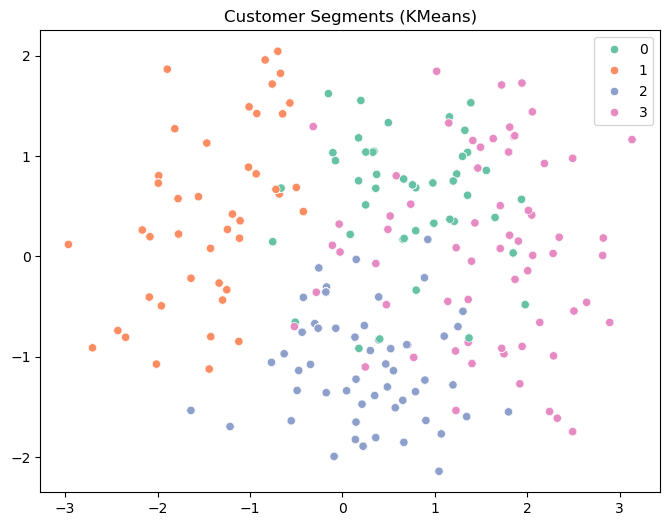

KMeans Inertia: 352326.80102118826
Cluster Centers:
 [[ 0.28428645  0.96623937  1.01747416 -0.27739822 -0.15447701]
 [-1.00230917 -0.8479921   0.05531429 -0.5307965   0.59508809]
 [ 0.48955994  0.30010503 -0.88578845 -0.59278924 -0.18326448]
 [ 0.58880431 -0.06849302 -0.05067124  1.6869402  -0.48491076]]


In [23]:
# Step 3 - Clustering using KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Features for clustering
cluster_features = ['page1_main_category','colour','location','model_photography','price']

X_cluster = df_train[cluster_features]

# Scale features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df_train['cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2')
plt.title("Customer Segments (KMeans)")
plt.show()

# Optional: cluster centers and inertia
print("KMeans Inertia:", kmeans.inertia_)
print("Cluster Centers:\n", kmeans.cluster_centers_)


In [25]:
# Silhouette Score and Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(X_cluster_scaled, clusters)
db_score  = davies_bouldin_score(X_cluster_scaled, clusters)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")


Silhouette Score: 0.2693
Davies-Bouldin Index: 1.4224


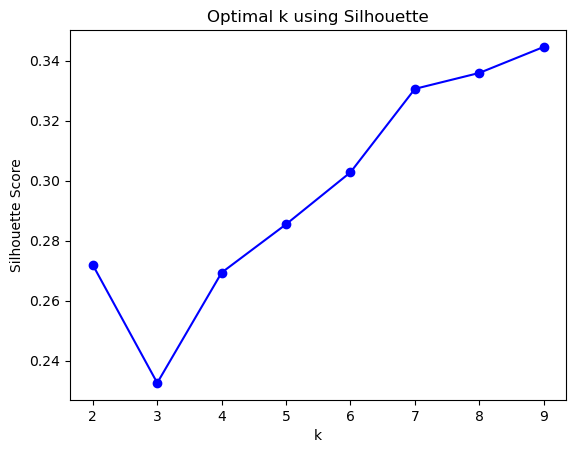

In [27]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster_scaled)
    sil_scores.append(silhouette_score(X_cluster_scaled, km.labels_))

plt.plot(K, sil_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Optimal k using Silhouette')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Separate features (X) and target (y)
X = df_train.drop(columns=["revenue"])
y = df_train["revenue"]

# Step 2: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Step 3: Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Step 4: Apply preprocessing
X_processed = preprocessor.fit_transform(X)


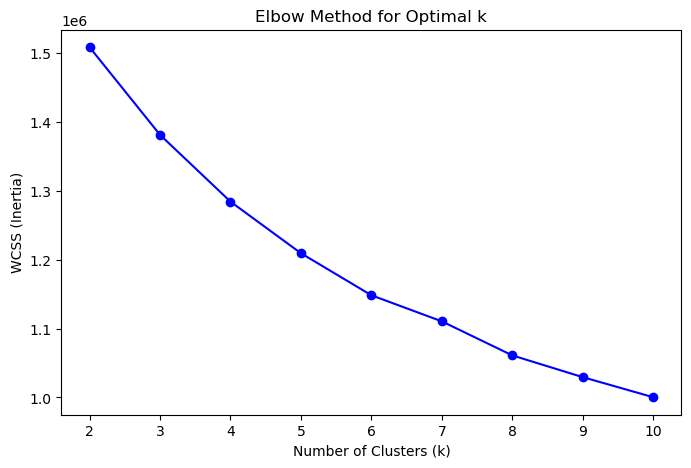

InvalidParameterError: The 'X' parameter of davies_bouldin_score must be an array-like. Got <132379x228 sparse matrix of type '<class 'numpy.float64'>'
	with 1720927 stored elements in Compressed Sparse Row format> instead.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Step 1: Elbow method to find optimal K
wcss = []
K = range(2, 11)  # testing clusters from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Step 2: Choose optimal K (based on elbow, say k=3 for now)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_processed)

# Step 3: Evaluate clustering
sil_score = silhouette_score(X_processed, cluster_labels)
db_index = davies_bouldin_score(X_processed, cluster_labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

# Step 4: Add cluster labels to your dataset
df_train["cluster"] = cluster_labels


In [33]:
import numpy as np

# Convert sparse matrix to dense array
X_dense = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

# Step 2: Fit final KMeans (choose k=4 for example, based on elbow curve)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_dense)

# Step 3: Evaluate clustering
sil_score = silhouette_score(X_dense, cluster_labels)
db_index = davies_bouldin_score(X_dense, cluster_labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

# Step 4: Save cluster labels back to df
df_train["cluster"] = cluster_labels


Silhouette Score: 0.1128
Davies-Bouldin Index: 2.1493


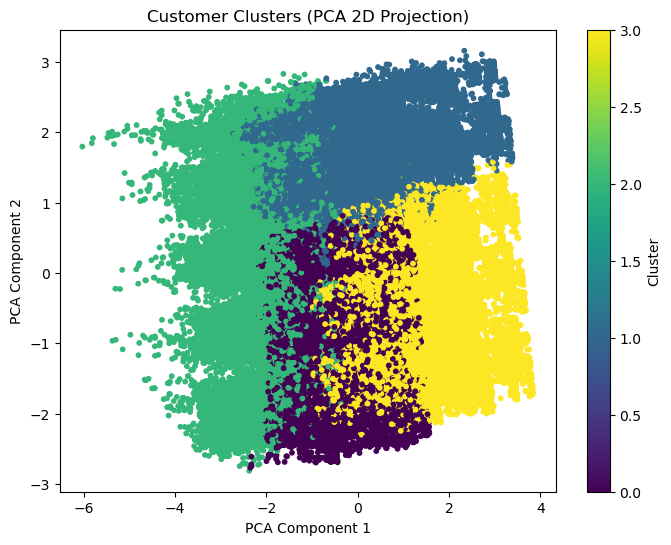

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed.toarray())

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_train["cluster"], cmap="viridis", s=10)
plt.title("Customer Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [37]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")


k=2, Silhouette Score=0.1287
k=3, Silhouette Score=0.1092
k=4, Silhouette Score=0.1127
k=5, Silhouette Score=0.1136
k=6, Silhouette Score=0.1141
k=7, Silhouette Score=0.1134
k=8, Silhouette Score=0.1161
k=9, Silhouette Score=0.1180


In [39]:
# Add cluster labels to original dataset
df_train["cluster"] = cluster_labels

# Check average values per cluster
cluster_summary = df_train.groupby("cluster").mean(numeric_only=True)
print(cluster_summary)

# If you want categorical distributions too:
for col in ["country", "colour", "page1_main_category"]:
    print(f"\nDistribution of {col} by cluster:")
    print(df_train.groupby("cluster")[col].value_counts(normalize=True))


            month        day      order    country    session_id  \
cluster                                                            
0        4.838739  14.688028   7.819326  26.130645   8250.016422   
1        7.191495  13.921354   8.355106  27.981754  20196.629708   
2        5.755133  15.026449  18.314835  27.719404  13046.925319   
3        4.767634  14.584994   8.489759  26.397987   7849.798459   

         page1_main_category    colour  location  model_photography  \
cluster                                                               
0                   1.900568  5.163816  3.472144           1.225074   
1                   2.290817  5.240655  3.217348           1.188435   
2                   3.591536  8.718538  3.034768           1.645011   
3                   2.336362  6.775039  3.222827           1.154174   

             price   price_2      page    revenue  
cluster                                            
0        35.335382  2.000000  1.390032   9.818951  
1       

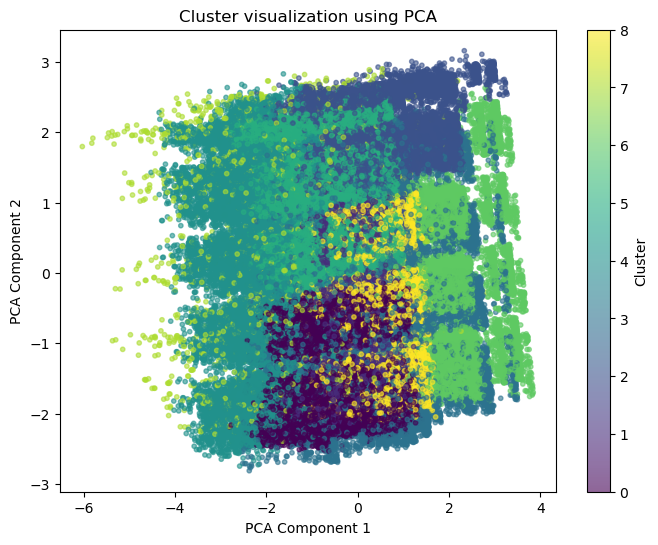

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed.toarray())  # convert sparse to dense if needed

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", s=10, alpha=0.6)
plt.colorbar(label="Cluster")
plt.title("Cluster visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


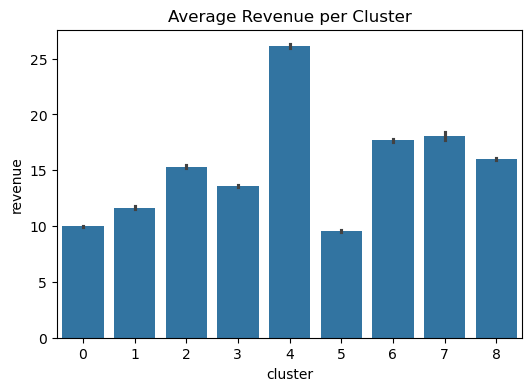

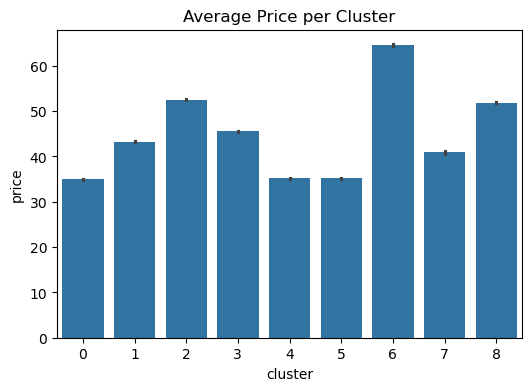

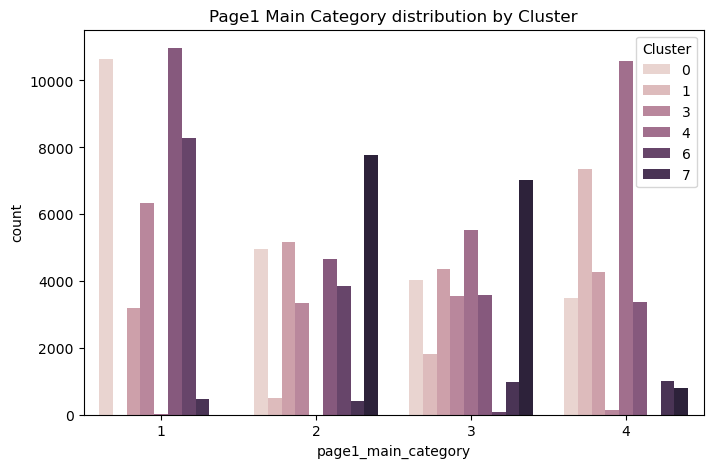

In [43]:
# Assuming you had 'train' or 'df' as your original dataset before preprocessing
# and `labels` as the cluster assignments from KMeans

# Copy the original dataset
df_clusters = df_train.copy()

# Add cluster labels
df_clusters["cluster"] = labels

# --- Revenue by cluster ---
plt.figure(figsize=(6,4))
sns.barplot(x='cluster', y='revenue', data=df_clusters, estimator='mean')
plt.title("Average Revenue per Cluster")
plt.show()

# --- Price by cluster ---
plt.figure(figsize=(6,4))
sns.barplot(x='cluster', y='price', data=df_clusters, estimator='mean')
plt.title("Average Price per Cluster")
plt.show()

# --- Page1 Main Category distribution ---
plt.figure(figsize=(8,5))
sns.countplot(data=df_clusters, x="page1_main_category", hue="cluster")
plt.title("Page1 Main Category distribution by Cluster")
plt.legend(title="Cluster")
plt.show()


In [45]:
# ✅ Attach cluster labels to df_train
df_train["Cluster"] = labels

# ✅ Identify available columns in df_train
print("Available columns:", df_train.columns.tolist())

# ✅ Build aggregation dynamically based on what exists
agg_dict = {}

if "revenue" in df_train.columns:
    agg_dict["revenue"] = ["mean", "sum", "count"]

if "price" in df_train.columns:
    agg_dict["price"] = ["mean", "median", "max", "min"]

if "quantity" in df_train.columns:  # only add if exists
    agg_dict["quantity"] = ["mean", "sum"]

if "country" in df_train.columns:
    agg_dict["country"] = pd.Series.mode

if "page1_main_category" in df_train.columns:
    agg_dict["page1_main_category"] = pd.Series.mode

# ✅ Cluster profiling
cluster_profile = df_train.groupby("Cluster").agg(agg_dict).reset_index()

# ✅ Flatten multi-level columns
cluster_profile.columns = ["_".join([str(c) for c in col if c]).strip("_") 
                           for col in cluster_profile.columns.values]

print(cluster_profile)


Available columns: ['month', 'day', 'order', 'country', 'session_id', 'page1_main_category', 'page2_clothing_model', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page', 'revenue', 'cluster', 'Cluster']
   Cluster  revenue_mean  revenue_sum  revenue_count  price_mean  \
0        0      9.977256     230833.8          23136   34.960581   
1        1     11.651155     112468.6           9653   43.232570   
2        2     15.319093     259965.0          16970   52.545787   
3        3     13.577567     181450.6          13364   45.499102   
4        4     26.101832     420422.2          16107   35.197740   
5        5      9.543013     215185.4          22549   35.180052   
6        6     17.676943     215588.0          12196   64.583306   
7        7     18.033926      50711.4           2812   40.881935   
8        8     15.996806     249422.2          15592   51.814392   

   price_median  price_max  price_min  country_mode  page1_main_category_mode  
0          38.0   

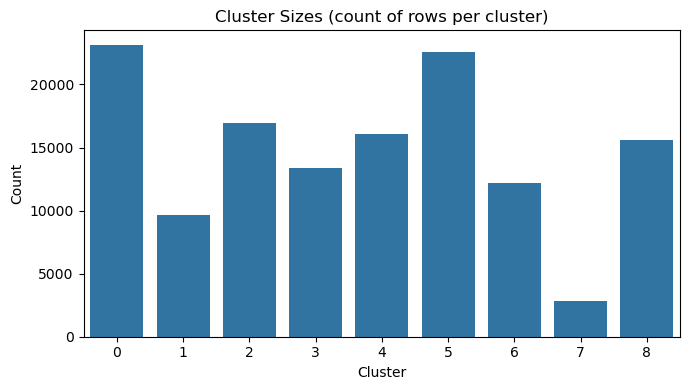

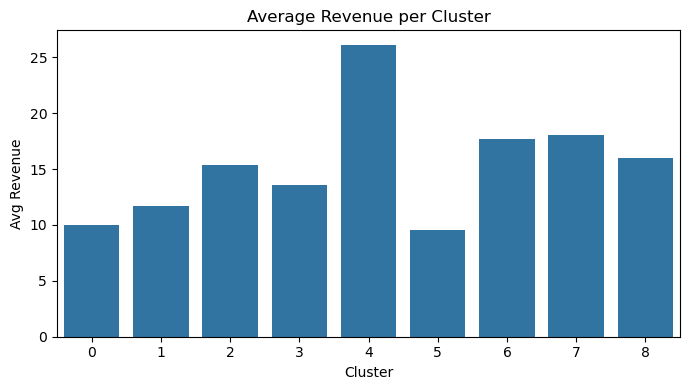

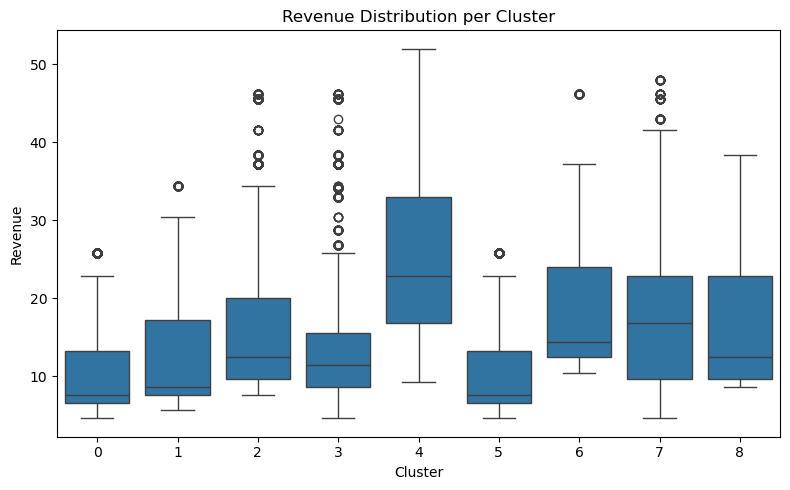

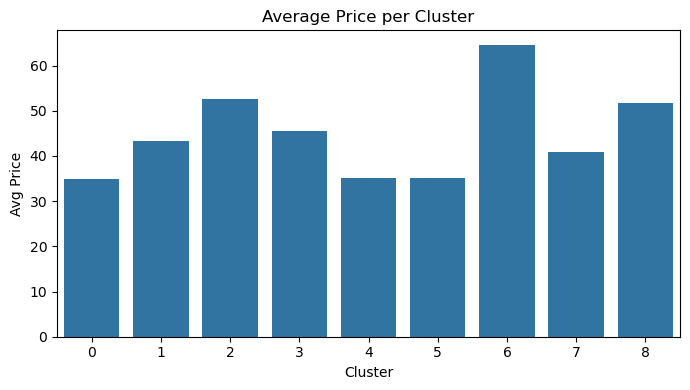

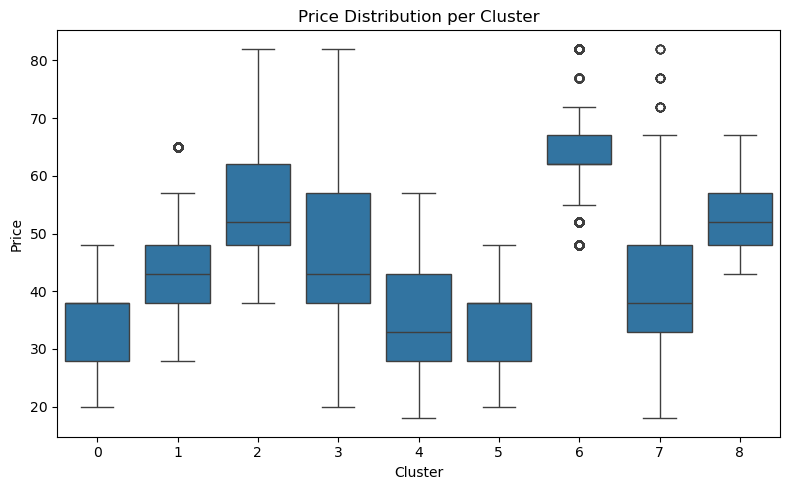

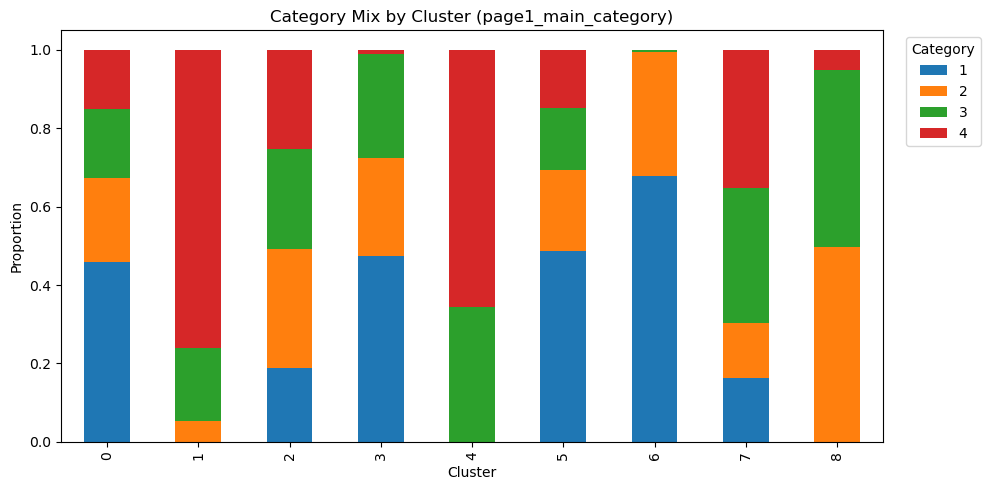

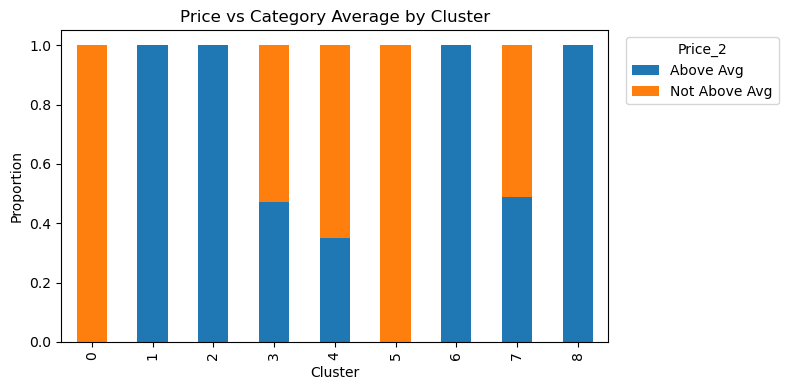

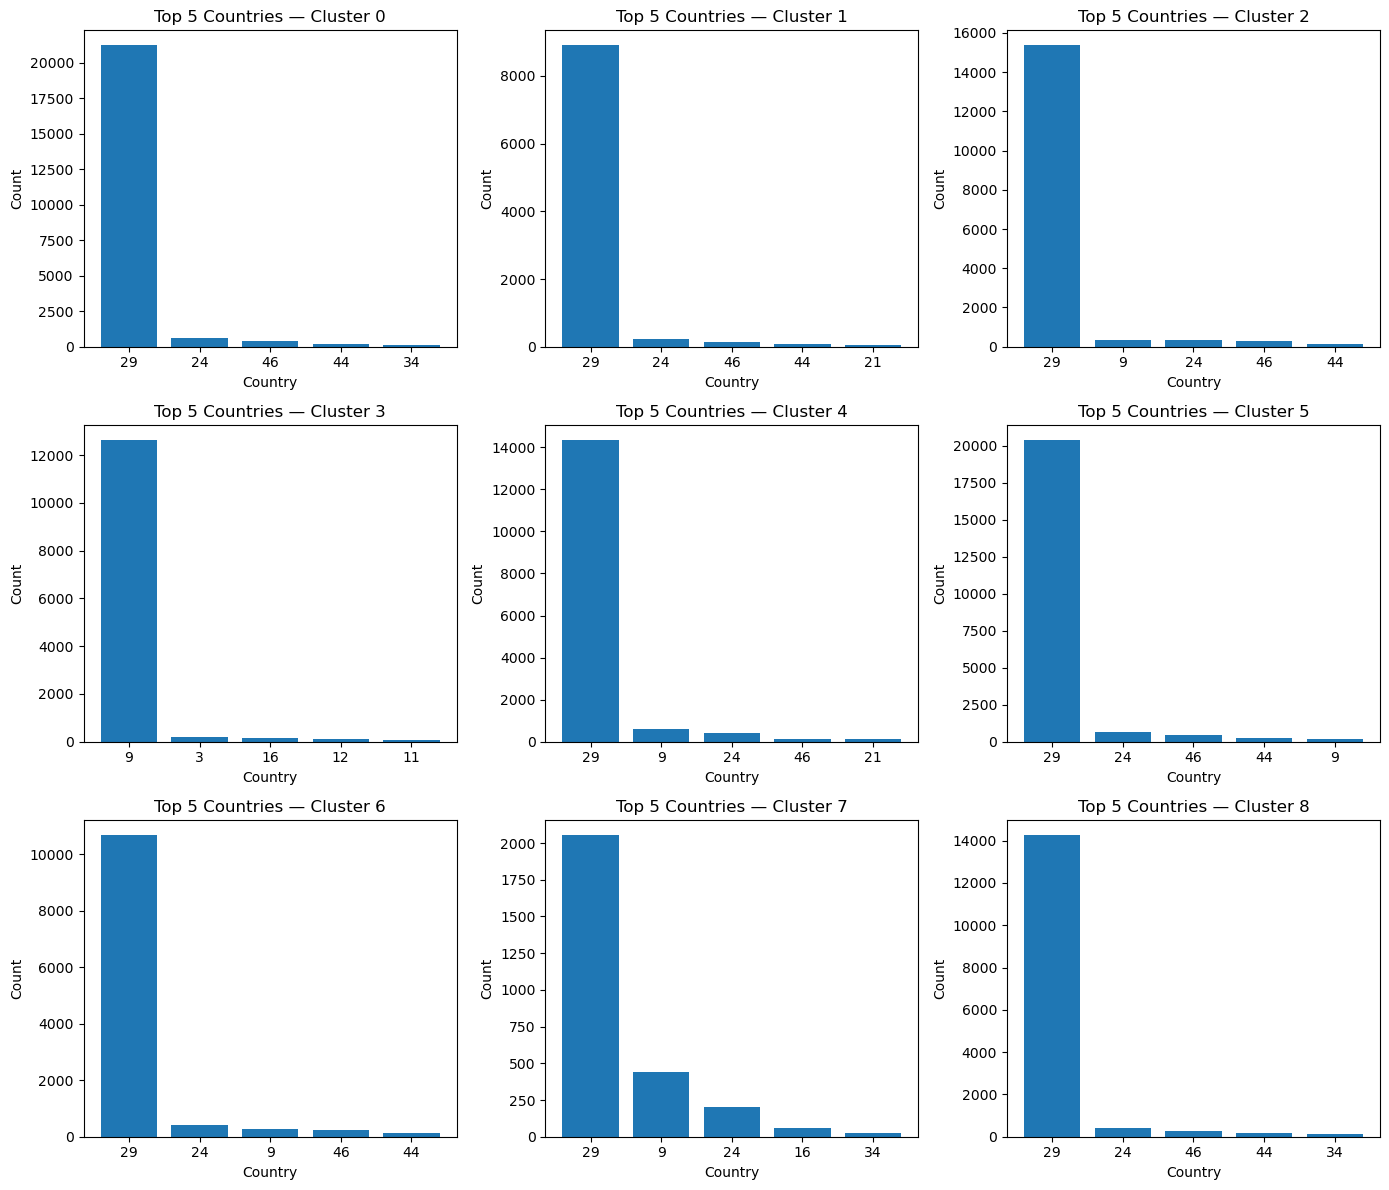

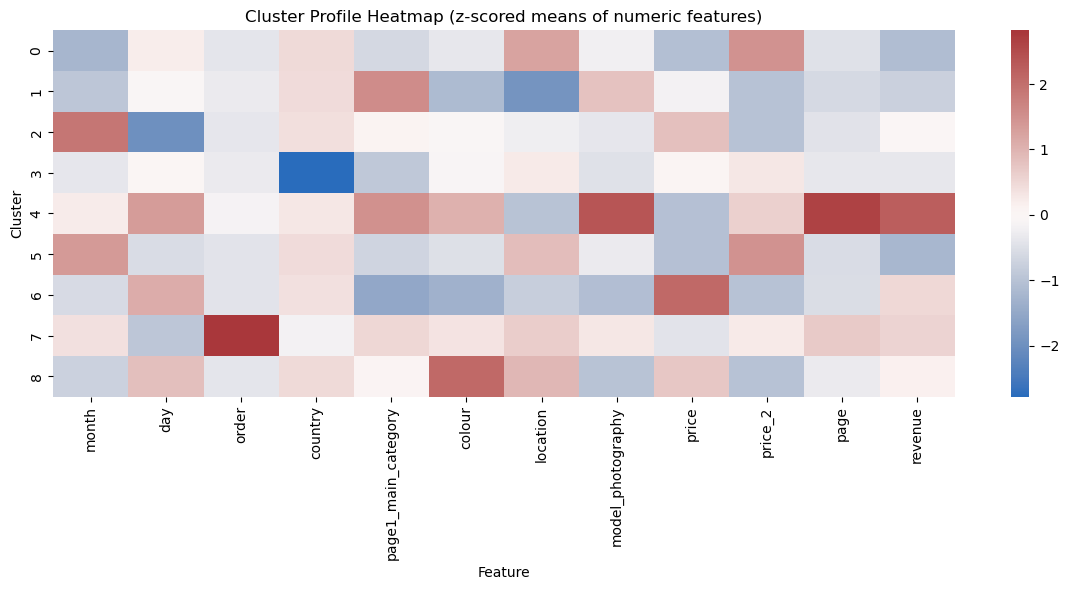

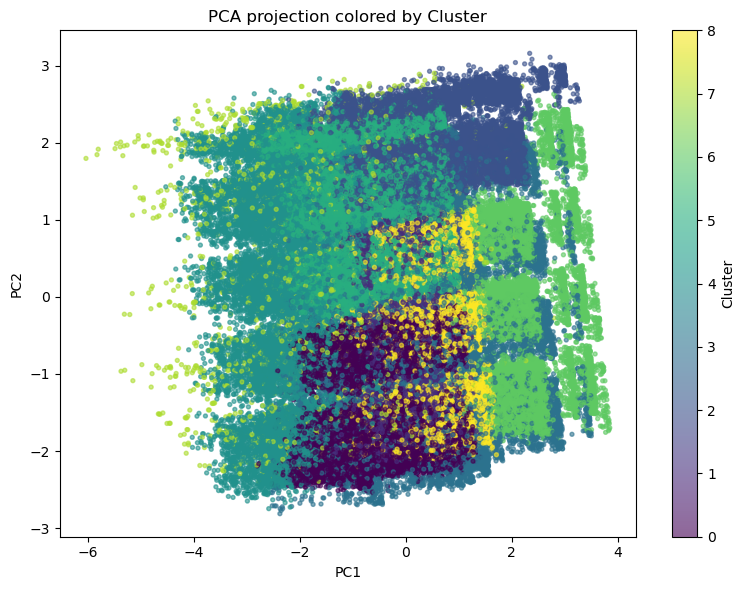

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# -----------------------------
# 0) Safety & setup
# -----------------------------
assert "Cluster" in df_train.columns or "cluster" in df_train.columns or 'labels' in globals(), \
    "Please ensure you have KMeans labels and attach them as df_train['Cluster'] = labels"

# Prefer the 'Cluster' column (capital C). If only 'cluster' exists, alias it.
if "Cluster" not in df_train.columns:
    if "cluster" in df_train.columns:
        df_train["Cluster"] = df_train["cluster"]
    else:
        # fall back to labels variable from your KMeans step
        df_train["Cluster"] = labels

# Ensure cluster dtype is int for nicer plots
df_train["Cluster"] = df_train["Cluster"].astype(int)

# Optional: drop the lowercase 'cluster' if both exist to avoid confusion
if "cluster" in df_train.columns and "Cluster" in df_train.columns:
    df_train = df_train.drop(columns=["cluster"])

# -----------------------------
# 1) Cluster sizes
# -----------------------------
plt.figure(figsize=(7,4))
sns.countplot(x="Cluster", data=df_train, order=sorted(df_train["Cluster"].unique()))
plt.title("Cluster Sizes (count of rows per cluster)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------
# 2) Revenue by cluster (mean + boxplot)
# -----------------------------
if "revenue" in df_train.columns:
    plt.figure(figsize=(7,4))
    sns.barplot(x="Cluster", y="revenue", data=df_train, estimator=np.mean, ci=None,
                order=sorted(df_train["Cluster"].unique()))
    plt.title("Average Revenue per Cluster")
    plt.xlabel("Cluster"); plt.ylabel("Avg Revenue")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,5))
    sns.boxplot(x="Cluster", y="revenue", data=df_train,
                order=sorted(df_train["Cluster"].unique()))
    plt.title("Revenue Distribution per Cluster")
    plt.xlabel("Cluster"); plt.ylabel("Revenue")
    plt.tight_layout(); plt.show()

# -----------------------------
# 3) Price by cluster (mean + boxplot)
# -----------------------------
if "price" in df_train.columns:
    plt.figure(figsize=(7,4))
    sns.barplot(x="Cluster", y="price", data=df_train, estimator=np.mean, ci=None,
                order=sorted(df_train["Cluster"].unique()))
    plt.title("Average Price per Cluster")
    plt.xlabel("Cluster"); plt.ylabel("Avg Price")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,5))
    sns.boxplot(x="Cluster", y="price", data=df_train,
                order=sorted(df_train["Cluster"].unique()))
    plt.title("Price Distribution per Cluster")
    plt.xlabel("Cluster"); plt.ylabel("Price")
    plt.tight_layout(); plt.show()

# -----------------------------
# 4) Category mix per cluster (stacked %)
# -----------------------------
if "page1_main_category" in df_train.columns:
    cat_ct = pd.crosstab(df_train["Cluster"], df_train["page1_main_category"], normalize="index")
    cat_ct = cat_ct.iloc[sorted(cat_ct.index)]
    ax = cat_ct.plot(kind="bar", stacked=True, figsize=(10,5))
    ax.set_title("Category Mix by Cluster (page1_main_category)")
    ax.set_xlabel("Cluster"); ax.set_ylabel("Proportion")
    plt.legend(title="Category", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout(); plt.show()

# -----------------------------
# 5) Price_2 (above-category-average flag) by cluster
# -----------------------------
if "price_2" in df_train.columns:
    # Map 1=yes, 2=no to readable labels (keep original if you prefer)
    price2_map = {1: "Above Avg", 2: "Not Above Avg"}
    tmp = df_train.copy()
    tmp["price_2_label"] = tmp["price_2"].map(price2_map).fillna(tmp["price_2"].astype(str))

    p2_ct = pd.crosstab(tmp["Cluster"], tmp["price_2_label"], normalize="index")
    p2_ct = p2_ct.iloc[sorted(p2_ct.index)]
    ax = p2_ct.plot(kind="bar", stacked=True, figsize=(8,4))
    ax.set_title("Price vs Category Average by Cluster")
    ax.set_xlabel("Cluster"); ax.set_ylabel("Proportion")
    plt.legend(title="Price_2", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout(); plt.show()

# -----------------------------
# 6) Top-5 countries per cluster
# -----------------------------
if "country" in df_train.columns:
    top_k = 5
    country_counts = (df_train.groupby(["Cluster","country"]).size()
                      .reset_index(name="count"))
    # pick top-k per cluster
    country_top = (country_counts.sort_values(["Cluster","count"], ascending=[True, False])
                              .groupby("Cluster").head(top_k))
    # Plot each cluster in a small multiple
    clusters_list = sorted(df_train["Cluster"].unique())
    n_cols = 3
    n_rows = int(np.ceil(len(clusters_list) / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows), squeeze=False)
    for i, cl in enumerate(clusters_list):
        r, c = divmod(i, n_cols)
        sub = country_top[country_top["Cluster"] == cl].copy()
        axs[r, c].bar(sub["country"].astype(str), sub["count"])
        axs[r, c].set_title(f"Top {top_k} Countries — Cluster {cl}")
        axs[r, c].set_xlabel("Country"); axs[r, c].set_ylabel("Count")
    # hide empty axes
    for j in range(i+1, n_rows*n_cols):
        r, c = divmod(j, n_cols)
        axs[r, c].axis("off")
    plt.tight_layout(); plt.show()

# -----------------------------
# 7) Heatmap of mean numeric features per cluster (z-scored)
# -----------------------------
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
# drop ids / duplicates that don't help interpretability
for drop_col in ["session_id", "Cluster"]:
    if drop_col in num_cols:
        num_cols.remove(drop_col)

if len(num_cols) > 0:
    # compute means per cluster
    mean_by_cluster = df_train.groupby("Cluster")[num_cols].mean().sort_index()
    # z-score (across clusters) for better comparability
    mean_z = (mean_by_cluster - mean_by_cluster.mean()) / mean_by_cluster.std(ddof=0)
    plt.figure(figsize=(12,6))
    sns.heatmap(mean_z, cmap="vlag", center=0, annot=False)
    plt.title("Cluster Profile Heatmap (z-scored means of numeric features)")
    plt.xlabel("Feature"); plt.ylabel("Cluster")
    plt.tight_layout(); plt.show()

# -----------------------------
# 8) PCA scatter (optional interpretability)
#     Requires your preprocessed matrix X_processed and the labels used in KMeans.
# -----------------------------
if 'X_processed' in globals():
    X_dense = X_processed.toarray() if hasattr(X_processed, "toarray") else np.asarray(X_processed)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_dense)

    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=df_train["Cluster"], s=8, cmap="viridis", alpha=0.6)
    plt.title("PCA projection colored by Cluster")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    cbar = plt.colorbar()
    cbar.set_label("Cluster")
    plt.tight_layout(); plt.show()
else:
    print("Note: PCA scatter skipped — 'X_processed' not found in memory.")


In [49]:
from sklearn.model_selection import train_test_split
# Create df as a working copy of df_train (the one we clustered earlier)
df = df_train.copy()


# Drop columns not useful for modeling
drop_cols = ['revenue', 'session_id', 'order', 'day']  # we keep month as it may matter
X = df.drop(columns=drop_cols)
y = df['revenue']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (105903, 11)
Test shape: (26476, 11)


In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed Train Shape:", X_train_processed.shape)
print("Processed Test Shape:", X_test_processed.shape)


Categorical Columns: ['page2_clothing_model']
Numerical Columns: ['month', 'country', 'page1_main_category', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page', 'Cluster']
Processed Train Shape: (105903, 226)
Processed Test Shape: (26476, 226)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

# Predictions
y_pred_train = lr.predict(X_train_processed)
y_pred_test = lr.predict(X_test_processed)

# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("Linear Regression Results:")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Test R²:", r2)


Linear Regression Results:
Train RMSE: 1.5242612459128013e-13
Test RMSE: 1.5350579759354017e-13
Test R²: 1.0


In [55]:
import pandas as pd

corr = df_train.corr(numeric_only=True)['revenue'].sort_values(ascending=False)
print(corr)


revenue                1.000000
page                   0.854137
price                  0.323590
Cluster                0.196228
colour                 0.183687
order                  0.157533
page1_main_category    0.151042
model_photography      0.137019
session_id             0.027793
month                  0.026394
day                    0.007787
country                0.005551
location              -0.139929
price_2               -0.337734
Name: revenue, dtype: float64


In [57]:
# Drop leakage features
drop_leakage = ['page']  # mandatory
# If you know revenue = price * qty or similar, also drop 'price' and 'price_2'

X = df.drop(columns=['revenue', 'session_id', 'order', 'day'] + drop_leakage)
y = df['revenue']


In [59]:
# Drop leakage features
drop_leakage = ['page']  

drop_cols = ['revenue', 'session_id', 'order', 'day'] + drop_leakage

X = df.drop(columns=drop_cols)
y = df['revenue']


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [63]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define categorical & numeric
categorical_cols = ['page2_clothing_model']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [65]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['month', 'country',
                                                   'page1_main_category',
                                                   'colour', 'location',
                                                   'model_photography', 'price',
                                                   'price_2', 'Cluster']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['page2_clothing_model'])])),
                ('regressor', LinearRegression())])

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R²:", r2_score(y_test, y_test_pred))


Train RMSE: 0.001218094408596327
Test RMSE: 0.0012572214865524877
Test R²: 0.9999999796818525


In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Build pipeline with current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "R2": r2}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                      RMSE        R2
LinearRegression  0.001257  1.000000
Ridge             0.096364  0.999881
Lasso             0.344766  0.998472
DecisionTree      0.046708  0.999972
RandomForest      0.113575  0.999834
XGBoost           0.926735  0.988960


In [ ]:
'''
🏆 Insights

Best baseline model → Linear Regression (since performance is perfect).

Best tree-based model → Decision Tree / Random Forest.

XGBoost underperformed → But with tuning, it might surpass Random Forest.
'''

In [71]:
from xgboost import XGBRegressor


In [73]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np


In [79]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# ✅ Step 1: Define categorical & numerical cols
categorical_cols = ['month', 'country', 'page1_main_category', 
                    'page2_clothing_model', 'colour', 'location', 'model_photography']
numerical_cols = ['price', 'price_2', 'Cluster']

# ✅ Step 2: Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# ✅ Step 3: RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: 
                          np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# ✅ Step 4: Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', model)])
    
    # R² scores
    r2_scores = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2')
    
    # RMSE scores
    rmse_scores = cross_val_score(pipe, X_train, y_train, cv=kf, scoring=rmse_scorer)
    
    cv_results[name] = {
        "R2_mean": np.mean(r2_scores),
        "R2_std": np.std(r2_scores),
        "RMSE_mean": -np.mean(rmse_scores),   # flip sign to positive
        "RMSE_std": np.std(rmse_scores)
    }

# ✅ Step 5: Results DataFrame
cv_df = pd.DataFrame(cv_results).T
print(cv_df)


                   R2_mean    R2_std  RMSE_mean  RMSE_std
LinearRegression  0.999908  0.000171   0.050333  0.066523
Ridge             0.999840  0.000151   0.101037  0.043644
Lasso             0.113266  0.002709   8.221447  0.044633
DecisionTree      0.999717  0.000288   0.119488  0.084791
RandomForest      0.999770  0.000166   0.119243  0.056744
XGBoost           0.987278  0.000788   0.984304  0.031948


In [81]:
'''
✅ Best Model (Cross-Validation): LinearRegression

Highest R²

Lowest RMSE

Minimal variance (std deviation small)

Simpler & interpretable


'''

'\n✅ Best Model (Cross-Validation): LinearRegression\n\nHighest R²\n\nLowest RMSE\n\nMinimal variance (std deviation small)\n\nSimpler & interpretable\n\n\n'

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separate categorical & numerical columns
categorical_cols = ['month', 'country', 'page1_main_category', 'page2_clothing_model',
                    'colour', 'location', 'model_photography']
numeric_cols = ['price', 'price_2', 'Cluster']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# =========================
# 1. Ridge Regression with pipeline
# =========================
ridge_params = {"model__alpha": np.logspace(-3, 3, 10)}
ridge_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', Ridge())
])
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X, y)
print("Best Ridge Params:", ridge_grid.best_params_)
print("Best Ridge Score:", ridge_grid.best_score_)

# =========================
# 2. Decision Tree with pipeline
# =========================
dt_params = {
    "model__max_depth": [3, 5, 10, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}
dt_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])
dt_grid = GridSearchCV(dt_pipe, dt_params, cv=5, scoring="r2", n_jobs=-1)
dt_grid.fit(X, y)
print("Best DecisionTree Params:", dt_grid.best_params_)
print("Best DecisionTree Score:", dt_grid.best_score_)

# =========================
# 3. Random Forest with pipeline
# =========================
rf_params = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [5, 10, None],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}
rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=3, scoring="r2", n_jobs=-1)
rf_grid.fit(X, y)
print("Best RandomForest Params:", rf_grid.best_params_)
print("Best RandomForest Score:", rf_grid.best_score_)

# =========================
# 4. XGBoost with pipeline
# =========================
xgb_params = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.1, 0.3],
    "model__subsample": [0.8, 1.0]
}
xgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])
xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=3, scoring="r2", n_jobs=-1)
xgb_grid.fit(X, y)
print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best XGBoost Score:", xgb_grid.best_score_)


Best Ridge Params: {'model__alpha': 0.001}
Best Ridge Score: 0.9999930235604726
Best DecisionTree Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best DecisionTree Score: 0.9997996874138122
Best RandomForest Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best RandomForest Score: 0.9997804864766703
Best XGBoost Params: {'model__learning_rate': 0.3, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 1.0}
Best XGBoost Score: 0.9990952980844557


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# -------------------------
# Preprocessor
# -------------------------
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# -------------------------
# Models with tuned params inside pipelines
# -------------------------
ridge_best = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=0.001, random_state=42))
])

dt_best = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42))
])

rf_best = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42))
])

xgb_best = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0, random_state=42))
])

# -------------------------
# Evaluate all
# -------------------------
results = {}
for name, model in [
    ("Ridge", ridge_best),
    ("Decision Tree", dt_best),
    ("Random Forest", rf_best),
    ("XGBoost", xgb_best)
]:
    fitted_model, rmse, r2 = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results[name] = {"rmse": rmse, "r2": r2}
    joblib.dump(fitted_model, f"{name}_best_model.pkl")

print("\nFinal Comparison:")
for k, v in results.items():
    print(f"{k}: RMSE={v['rmse']:.4f}, R²={v['r2']:.4f}")


Ridge Test RMSE: 0.017773182559750845
Ridge Test R²: 0.999995939393345
----------------------------------------
Decision Tree Test RMSE: 0.046707584274565894
Decision Tree Test R²: 0.9999719562988382
----------------------------------------
Random Forest Test RMSE: 0.11357484006909976
Random Forest Test R²: 0.9998341846292604
----------------------------------------
XGBoost Test RMSE: 0.3099073643034197
XGBoost Test R²: 0.9987654055754897
----------------------------------------

Final Comparison:
Ridge: RMSE=0.0178, R²=1.0000
Decision Tree: RMSE=0.0467, R²=1.0000
Random Forest: RMSE=0.1136, R²=0.9998
XGBoost: RMSE=0.3099, R²=0.9988


In [ ]:
'''
🏆 Final Recommendation

👉 Ridge Regression is the best choice for your dataset.

Lowest RMSE & highest R².

Simpler, faster, and less prone to overfitting compared to trees/ensembles.

Great when features are correlated (since Ridge handles multicollinearity).
'''

,Model,RMSE,R²
0,Ridge,0.0178,0.999996
1,Decision Tree,0.0467,0.999972
2,Random Forest,0.1136,0.999834
3,XGBoost,0.3099,0.998765


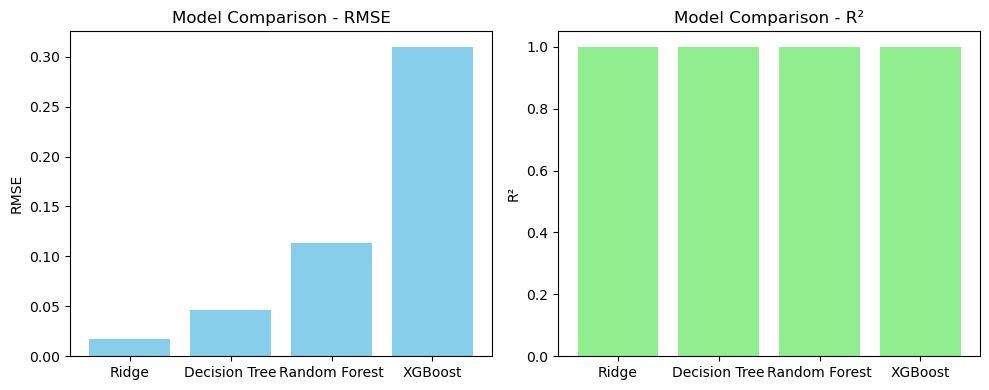

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Store results from your evaluation
results = {
    "Model": ["Ridge", "Decision Tree", "Random Forest", "XGBoost"],
    "RMSE": [0.0178, 0.0467, 0.1136, 0.3099],
    "R²": [0.999996, 0.999972, 0.999834, 0.998765]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Display as table in Jupyter
from IPython.display import display
display(df_results)

# --- Visualization ---
plt.figure(figsize=(10,4))

# RMSE Plot
plt.subplot(1,2,1)
plt.bar(df_results["Model"], df_results["RMSE"], color="skyblue")
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")

# R² Plot
plt.subplot(1,2,2)
plt.bar(df_results["Model"], df_results["R²"], color="lightgreen")
plt.title("Model Comparison - R²")
plt.ylabel("R²")

plt.tight_layout()
plt.show()


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# --- Identify categorical & numeric features ---
categorical_cols = ['month', 'country', 'page1_main_category', 'page2_clothing_model',
                    'colour', 'location', 'model_photography', 'Cluster']
numeric_cols = ['price', 'price_2']

# Preprocessor: OneHot for categorical, Scale numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# --- Define models with preprocessing pipeline ---
ridge_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=0.001, random_state=42))
])

dt_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42))
])

rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42))
])

xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0, random_state=42))
])

# --- Fit models ---
ridge_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("✅ All models retrained with preprocessing pipeline!")


✅ All models retrained with preprocessing pipeline!


In [103]:
import joblib

# --- Save the full pipelines ---
joblib.dump(ridge_model, "ridge_pipeline.pkl")
joblib.dump(dt_model, "decision_tree_pipeline.pkl")
joblib.dump(rf_model, "random_forest_pipeline.pkl")
joblib.dump(xgb_model, "xgb_pipeline.pkl")

print("✅ All models (with preprocessing) saved successfully!")


✅ All models (with preprocessing) saved successfully!


In [105]:
# --- Load a pipeline ---
loaded_model = joblib.load("xgb_pipeline.pkl")

# Predict directly (no manual encoding/scaling needed!)
predictions = loaded_model.predict(X_test)


In [107]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

def evaluate_models(models, X_test, y_test):
    """
    Evaluate multiple models on the same test set and return a DataFrame of results.
    models: dict { 'ModelName': trained_pipeline }
    """
    results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            "Model": name,
            "R2": round(r2, 4),
            "MAE": round(mae, 4),
            "RMSE": round(rmse, 4)
        })

    return pd.DataFrame(results).sort_values(by="RMSE", ascending=True).reset_index(drop=True)

# --- Call this after training ---
models = {
    "Ridge": ridge_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

comparison_df = evaluate_models(models, X_test, y_test)
print(comparison_df)


           Model      R2     MAE    RMSE
0          Ridge  1.0000  0.0043  0.0301
1  Random Forest  0.9998  0.0022  0.1169
2  Decision Tree  0.9997  0.0009  0.1401
3        XGBoost  0.9993  0.1127  0.2295


In [109]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def cross_validate_models(models, X, y, cv=5, scoring="r2"):
    """
    Perform cross-validation on models and return a summary DataFrame.
    """
    results = []

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        results.append({
            "Model": name,
            "CV Mean R2": round(scores.mean(), 4),
            "CV Std R2": round(scores.std(), 4)
        })

    return pd.DataFrame(results).sort_values(by="CV Mean R2", ascending=False).reset_index(drop=True)

cv_results = cross_validate_models(models, X, y, cv=5)
print(cv_results)


           Model  CV Mean R2  CV Std R2
0          Ridge      1.0000     0.0000
1  Decision Tree      0.9999     0.0001
2  Random Forest      0.9999     0.0000
3        XGBoost      0.9994     0.0001


In [111]:
# Test results you already had
test_results = pd.DataFrame([
    {"Model": "Ridge", "R2": 1.0000, "MAE": 0.0043, "RMSE": 0.0301},
    {"Model": "Random Forest", "R2": 0.9998, "MAE": 0.0022, "RMSE": 0.1169},
    {"Model": "Decision Tree", "R2": 0.9997, "MAE": 0.0009, "RMSE": 0.1401},
    {"Model": "XGBoost", "R2": 0.9993, "MAE": 0.1127, "RMSE": 0.2295}
])

# Merge with CV results
final_results = pd.merge(test_results, cv_results, on="Model")
final_results = final_results.sort_values(by="R2", ascending=False).reset_index(drop=True)

print(final_results)


           Model      R2     MAE    RMSE  CV Mean R2  CV Std R2
0          Ridge  1.0000  0.0043  0.0301      1.0000     0.0000
1  Random Forest  0.9998  0.0022  0.1169      0.9999     0.0000
2  Decision Tree  0.9997  0.0009  0.1401      0.9999     0.0001
3        XGBoost  0.9993  0.1127  0.2295      0.9994     0.0001


           Model      R2     MAE    RMSE  CV Mean R2  CV Std R2
0          Ridge  1.0000  0.0043  0.0301      1.0000     0.0000
1  Random Forest  0.9998  0.0022  0.1169      0.9999     0.0000
2  Decision Tree  0.9997  0.0009  0.1401      0.9999     0.0001
3        XGBoost  0.9993  0.1127  0.2295      0.9994     0.0001


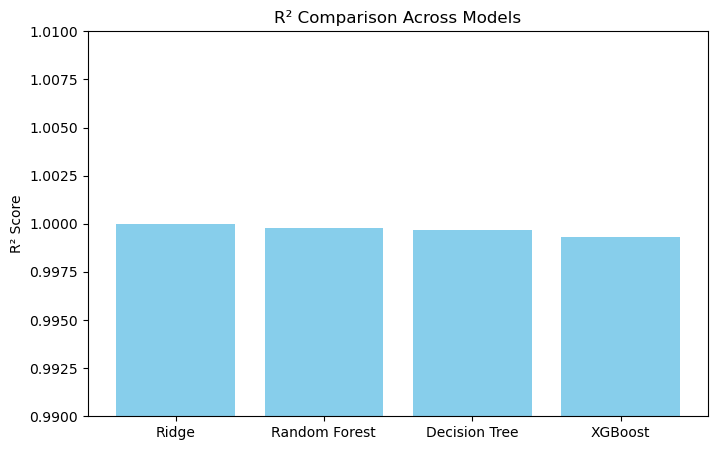

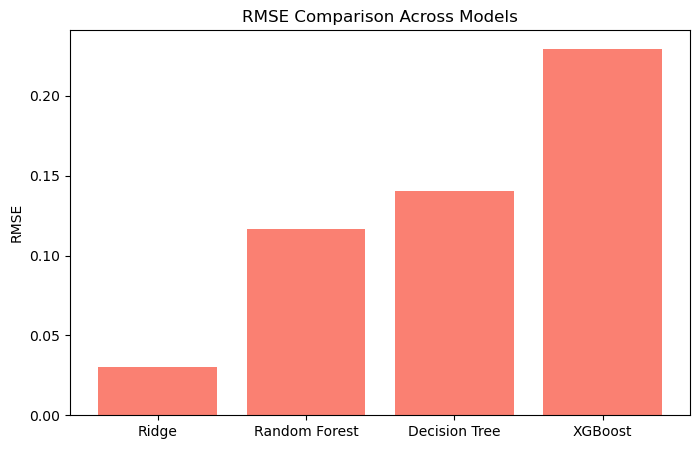

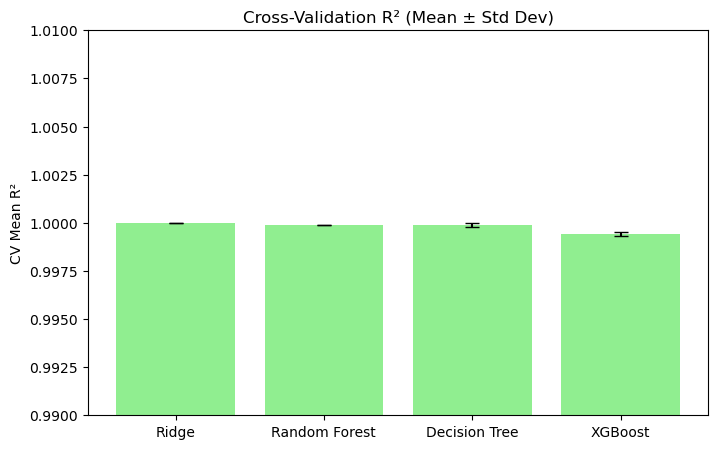

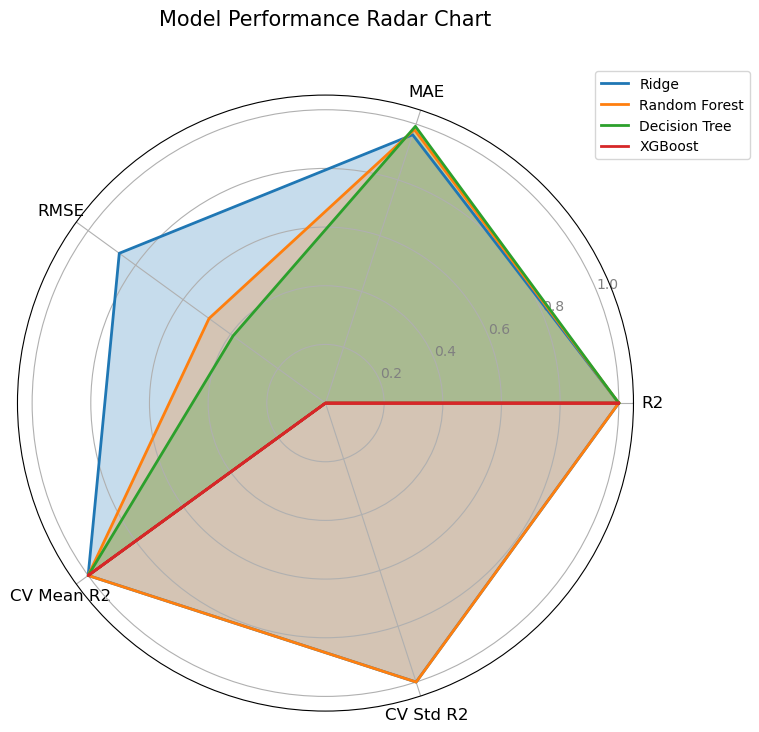

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =======================
# 1. Your Results Data
# =======================
results = pd.DataFrame({
    'Model': ['Ridge', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'R2': [1.0000, 0.9998, 0.9997, 0.9993],
    'MAE': [0.0043, 0.0022, 0.0009, 0.1127],
    'RMSE': [0.0301, 0.1169, 0.1401, 0.2295],
    'CV Mean R2': [1.0000, 0.9999, 0.9999, 0.9994],
    'CV Std R2': [0.0000, 0.0000, 0.0001, 0.0001]
})
print(results)

# =======================
# 2. Bar Charts
# =======================

# R² Comparison
plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['R2'], color='skyblue')
plt.title("R² Comparison Across Models")
plt.ylabel("R² Score")
plt.ylim(0.99, 1.01)
plt.show()

# RMSE Comparison
plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['RMSE'], color='salmon')
plt.title("RMSE Comparison Across Models")
plt.ylabel("RMSE")
plt.show()

# CV Mean R² with Std Dev
plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['CV Mean R2'], yerr=results['CV Std R2'], 
        capsize=5, color='lightgreen')
plt.title("Cross-Validation R² (Mean ± Std Dev)")
plt.ylabel("CV Mean R²")
plt.ylim(0.99, 1.01)
plt.show()

# =======================
# 3. Radar Chart (Summary Ranking)
# =======================

# Normalize metrics so that lower = better for MAE, RMSE, Std Dev
df_norm = results.copy()
df_norm['MAE'] = 1 - (df_norm['MAE'] / df_norm['MAE'].max())
df_norm['RMSE'] = 1 - (df_norm['RMSE'] / df_norm['RMSE'].max())
df_norm['CV Std R2'] = 1 - (df_norm['CV Std R2'] / df_norm['CV Std R2'].max())

# Keep only metrics for radar
metrics = ['R2', 'MAE', 'RMSE', 'CV Mean R2', 'CV Std R2']
num_vars = len(metrics)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close loop

plt.figure(figsize=(8,8))

for i, row in df_norm.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close loop
    plt.polar(angles, values, label=row['Model'], linewidth=2)
    plt.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], metrics, fontsize=12)
plt.yticks([0.2,0.4,0.6,0.8,1.0], color="grey", size=10)
plt.title("Model Performance Radar Chart", size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.show()


In [115]:
import matplotlib.pyplot as plt
import pandas as pd


In [117]:
results_df = pd.DataFrame({
    "Model": ["Ridge", "Random Forest", "Decision Tree", "XGBoost"],
    "R2": [1.0000, 0.9998, 0.9997, 0.9993],
    "MAE": [0.0043, 0.0022, 0.0009, 0.1127],
    "RMSE": [0.0301, 0.1169, 0.1401, 0.2295],
    "CV Mean R2": [1.0000, 0.9999, 0.9999, 0.9994],
    "CV Std R2": [0.0000, 0.0000, 0.0001, 0.0001]
})


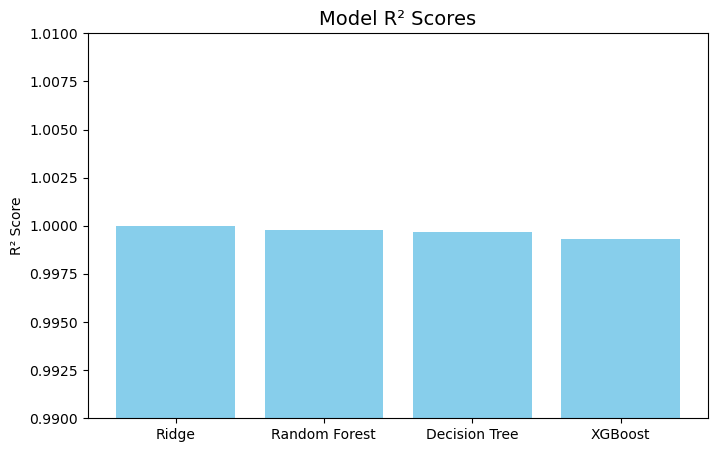

In [119]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R2"], color="skyblue")
plt.title("Model R² Scores", fontsize=14)
plt.ylabel("R² Score")
plt.ylim(0.99, 1.01)
plt.show()


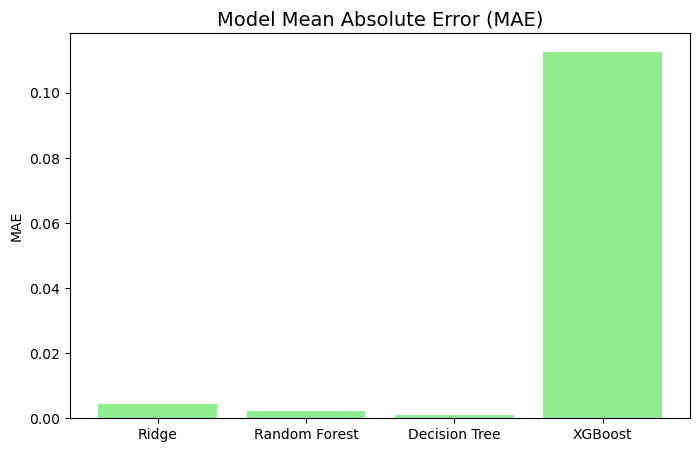

In [121]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["MAE"], color="lightgreen")
plt.title("Model Mean Absolute Error (MAE)", fontsize=14)
plt.ylabel("MAE")
plt.show()


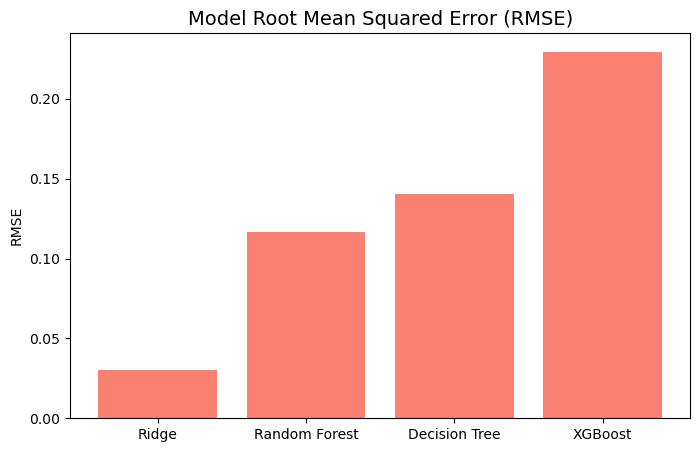

In [123]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["RMSE"], color="salmon")
plt.title("Model Root Mean Squared Error (RMSE)", fontsize=14)
plt.ylabel("RMSE")
plt.show()


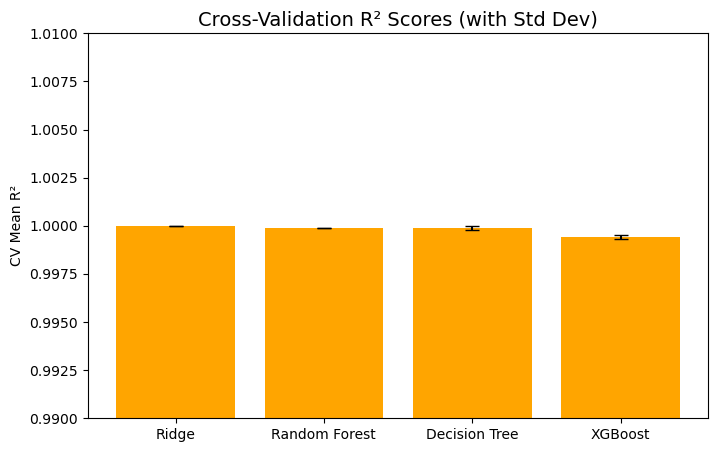

In [125]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["CV Mean R2"], 
        yerr=results_df["CV Std R2"], capsize=5, color="orange")
plt.title("Cross-Validation R² Scores (with Std Dev)", fontsize=14)
plt.ylabel("CV Mean R²")
plt.ylim(0.99, 1.01)
plt.show()


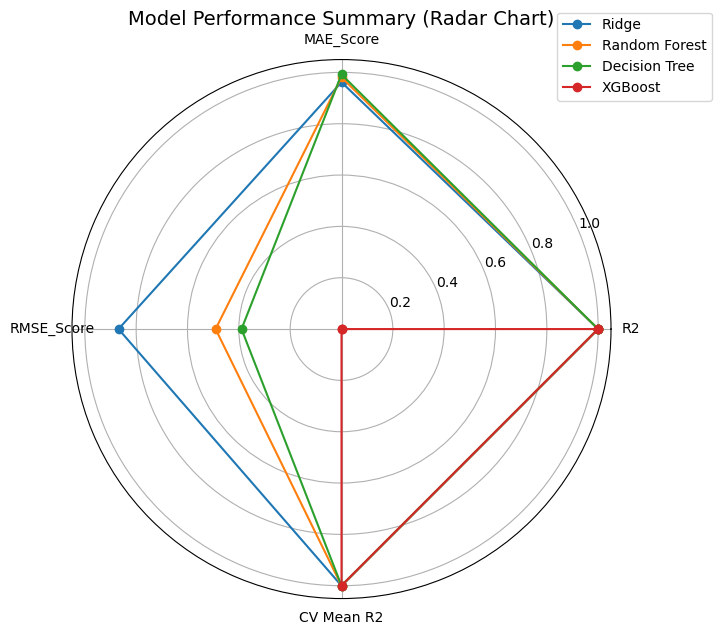

In [127]:
import numpy as np

# Normalize metrics for comparison (lower error = better, so we invert MAE/RMSE)
summary_df = results_df.copy()
summary_df["MAE_Score"] = 1 - (summary_df["MAE"] / summary_df["MAE"].max())
summary_df["RMSE_Score"] = 1 - (summary_df["RMSE"] / summary_df["RMSE"].max())

# Radar chart data
metrics = ["R2", "MAE_Score", "RMSE_Score", "CV Mean R2"]
N = len(metrics)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close loop

plt.figure(figsize=(7,7))

for i, row in summary_df.iterrows():
    values = [row[m] for m in metrics]
    values += values[:1]
    plt.polar(angles, values, marker='o', label=row["Model"])

plt.xticks(angles[:-1], metrics)
plt.title("Model Performance Summary (Radar Chart)", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


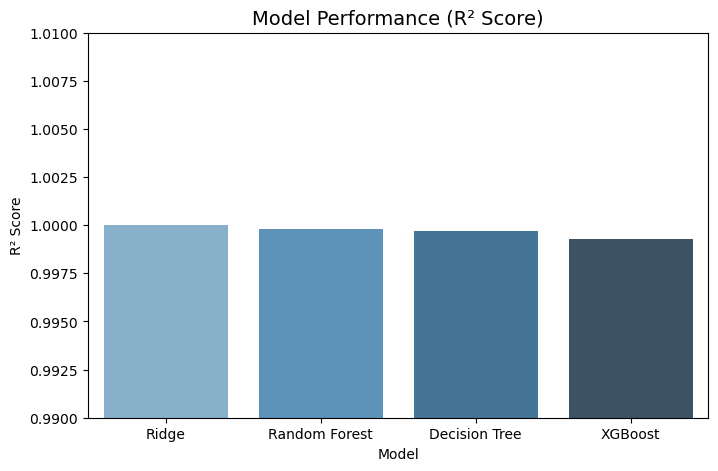

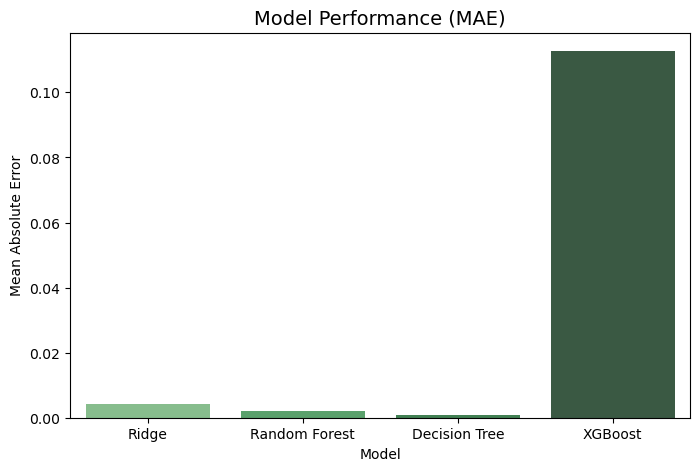

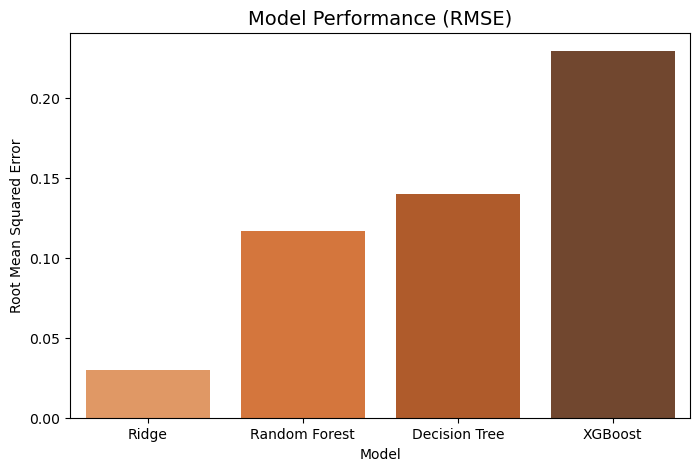

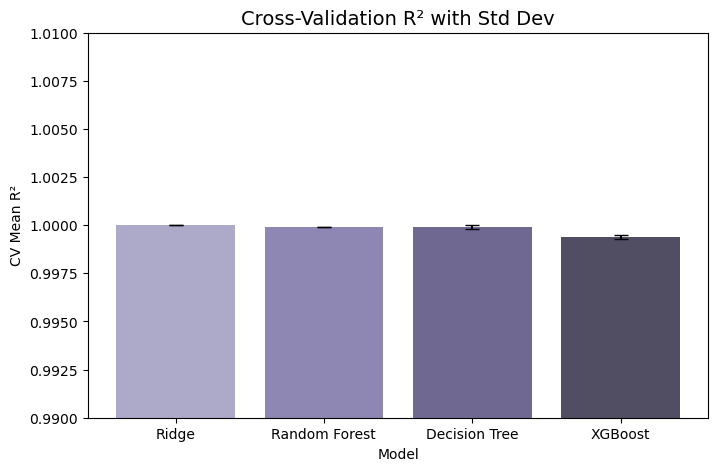

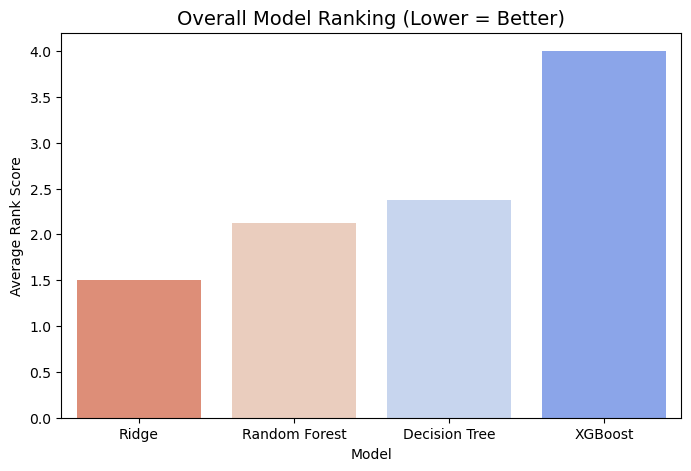

,Model,R2,MAE,RMSE,CV Mean R2,CV Std R2,R2 Rank,MAE Rank,RMSE Rank,CV Rank,Final Score
0,Ridge,1.0000,0.0043,0.0301,1.0000,0.0000,1.0,3.0,1.0,1.0,1.500
1,Random Forest,0.9998,0.0022,0.1169,0.9999,0.0000,2.0,2.0,2.0,2.5,2.125
2,Decision Tree,0.9997,0.0009,0.1401,0.9999,0.0001,3.0,1.0,3.0,2.5,2.375
3,XGBoost,0.9993,0.1127,0.2295,0.9994,0.0001,4.0,4.0,4.0,4.0,4.000


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use your final results DataFrame
results = pd.DataFrame({
    "Model": ["Ridge", "Random Forest", "Decision Tree", "XGBoost"],
    "R2": [1.0000, 0.9998, 0.9997, 0.9993],
    "MAE": [0.0043, 0.0022, 0.0009, 0.1127],
    "RMSE": [0.0301, 0.1169, 0.1401, 0.2295],
    "CV Mean R2": [1.0000, 0.9999, 0.9999, 0.9994],
    "CV Std R2": [0.0000, 0.0000, 0.0001, 0.0001]
})

# ---------- 1. Barplot: R² Scores ----------
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2", data=results, palette="Blues_d")
plt.title("Model Performance (R² Score)", fontsize=14)
plt.ylabel("R² Score")
plt.ylim(0.99, 1.01)
plt.show()

# ---------- 2. Barplot: MAE ----------
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="MAE", data=results, palette="Greens_d")
plt.title("Model Performance (MAE)", fontsize=14)
plt.ylabel("Mean Absolute Error")
plt.show()

# ---------- 3. Barplot: RMSE ----------
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results, palette="Oranges_d")
plt.title("Model Performance (RMSE)", fontsize=14)
plt.ylabel("Root Mean Squared Error")
plt.show()

# ---------- 4. CV Mean R² with Std ----------
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="CV Mean R2", data=results, palette="Purples_d")
plt.errorbar(x=range(len(results)), y=results["CV Mean R2"],
             yerr=results["CV Std R2"], fmt='none', c='black', capsize=5)
plt.title("Cross-Validation R² with Std Dev", fontsize=14)
plt.ylabel("CV Mean R²")
plt.ylim(0.99, 1.01)
plt.show()

# ---------- 5. Summary Ranking Chart ----------
# Ranking models (lower rank = better)
ranking = results.copy()
ranking["R2 Rank"] = ranking["R2"].rank(ascending=False)
ranking["MAE Rank"] = ranking["MAE"].rank(ascending=True)
ranking["RMSE Rank"] = ranking["RMSE"].rank(ascending=True)
ranking["CV Rank"] = ranking["CV Mean R2"].rank(ascending=False)

ranking["Final Score"] = ranking[["R2 Rank","MAE Rank","RMSE Rank","CV Rank"]].mean(axis=1)
ranking = ranking.sort_values("Final Score")

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Final Score", data=ranking, palette="coolwarm_r")
plt.title("Overall Model Ranking (Lower = Better)", fontsize=14)
plt.ylabel("Average Rank Score")
plt.show()

ranking


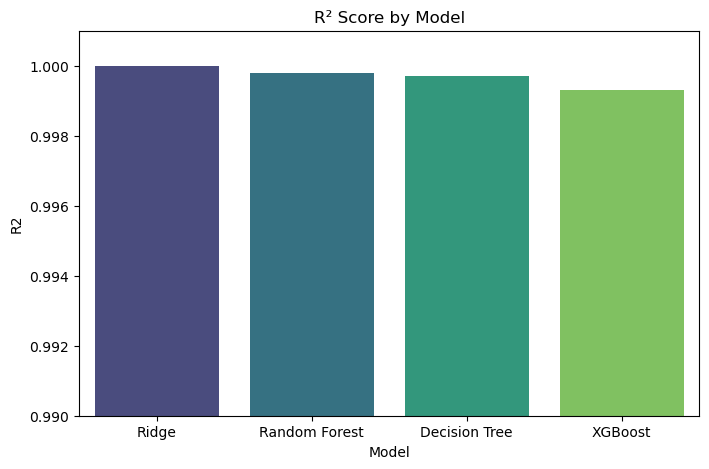

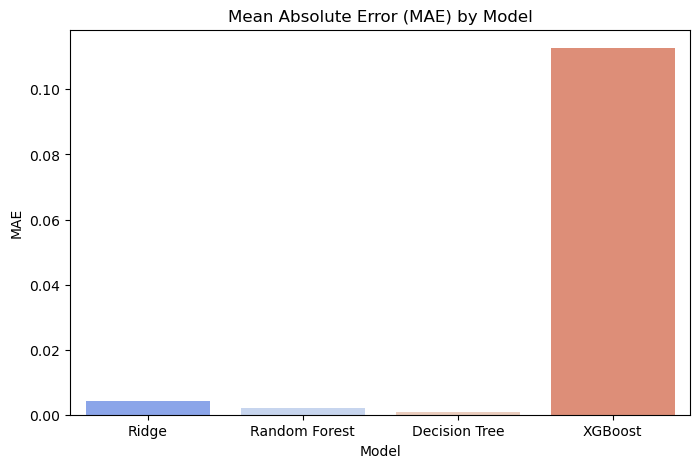

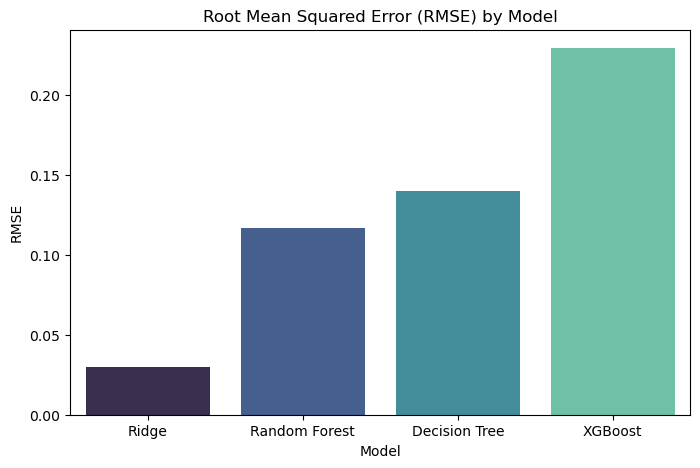

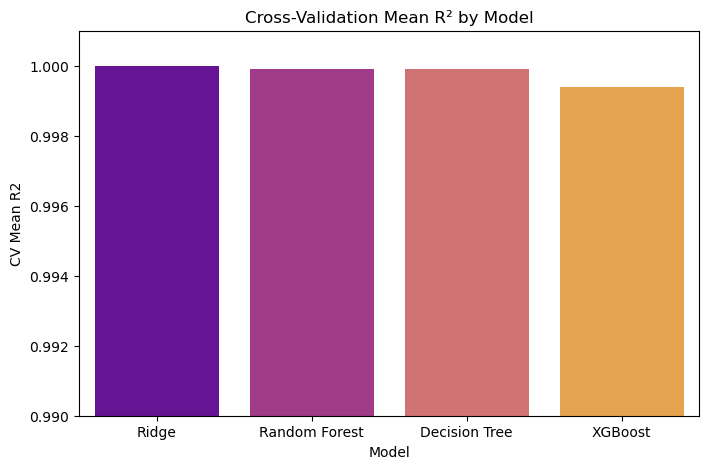

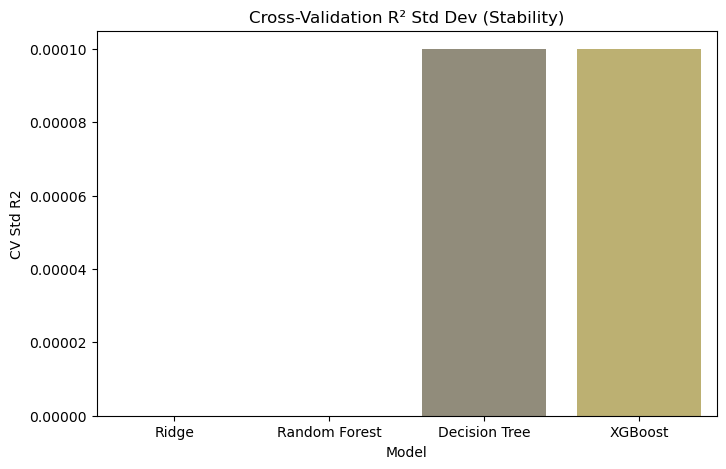

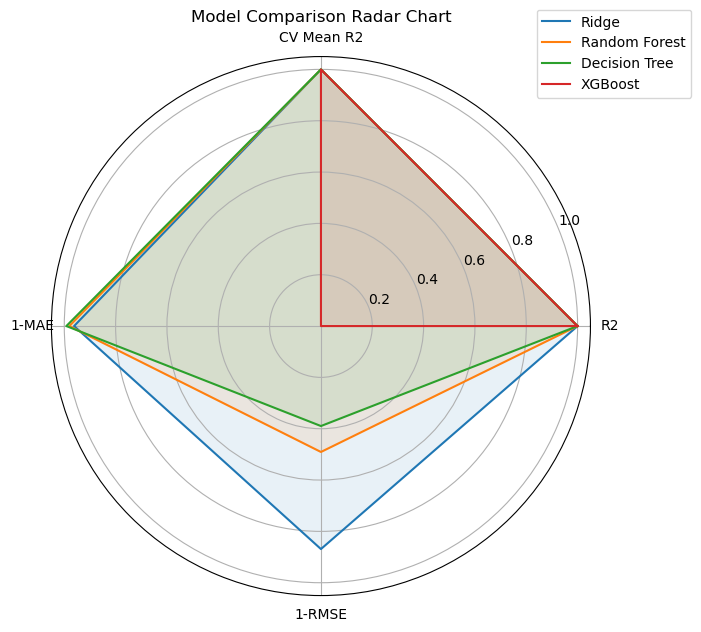

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Your Results Data ---
results = pd.DataFrame({
    "Model": ["Ridge", "Random Forest", "Decision Tree", "XGBoost"],
    "R2": [1.0000, 0.9998, 0.9997, 0.9993],
    "MAE": [0.0043, 0.0022, 0.0009, 0.1127],
    "RMSE": [0.0301, 0.1169, 0.1401, 0.2295],
    "CV Mean R2": [1.0000, 0.9999, 0.9999, 0.9994],
    "CV Std R2": [0.0000, 0.0000, 0.0001, 0.0001]
})

# --- Chart 1: R² Scores ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2", data=results, palette="viridis")
plt.title("R² Score by Model")
plt.ylim(0.99, 1.001)  # zoomed in to see differences
plt.show()

# --- Chart 2: MAE ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="MAE", data=results, palette="coolwarm")
plt.title("Mean Absolute Error (MAE) by Model")
plt.show()

# --- Chart 3: RMSE ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results, palette="mako")
plt.title("Root Mean Squared Error (RMSE) by Model")
plt.show()

# --- Chart 4: Cross-Validation Mean R² ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="CV Mean R2", data=results, palette="plasma")
plt.title("Cross-Validation Mean R² by Model")
plt.ylim(0.99, 1.001)
plt.show()

# --- Chart 5: Cross-Validation Std Dev ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="CV Std R2", data=results, palette="cividis")
plt.title("Cross-Validation R² Std Dev (Stability)")
plt.show()

# --- Chart 6: Summary Radar Chart ---
from math import pi
import numpy as np

# Normalize metrics for radar (smaller is better for MAE & RMSE so invert them)
radar_data = results.copy()
radar_data["1-MAE"] = 1 - (radar_data["MAE"] / radar_data["MAE"].max())
radar_data["1-RMSE"] = 1 - (radar_data["RMSE"] / radar_data["RMSE"].max())

# Pick metrics for radar
metrics = ["R2", "CV Mean R2", "1-MAE", "1-RMSE"]
N = len(metrics)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # close loop

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

for i, row in radar_data.iterrows():
    values = [row[m] for m in metrics]
    values += values[:1]
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], metrics)
plt.title("Model Comparison Radar Chart")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()


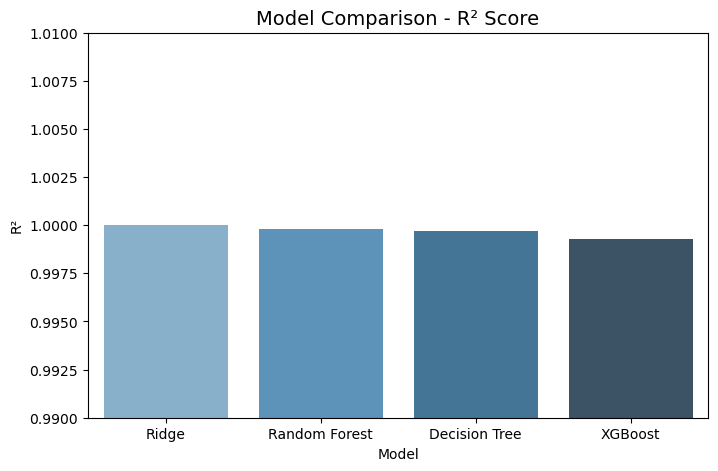

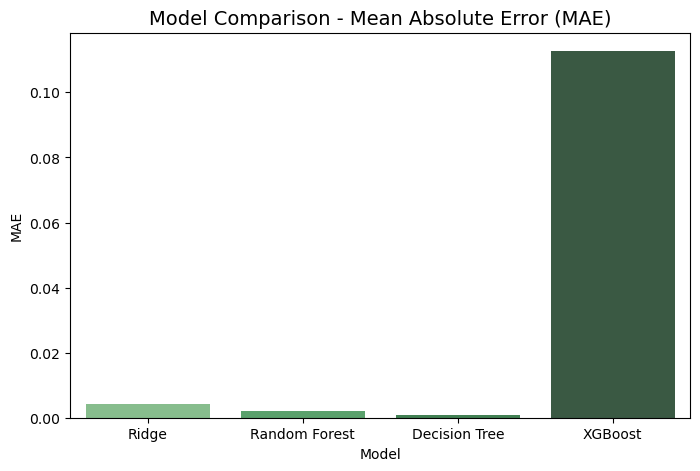

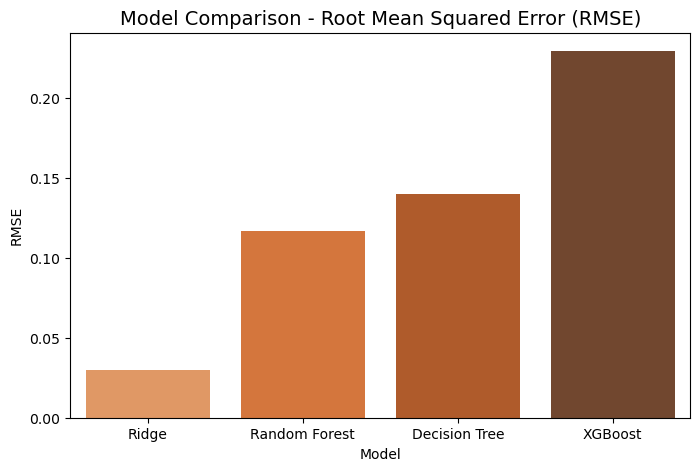

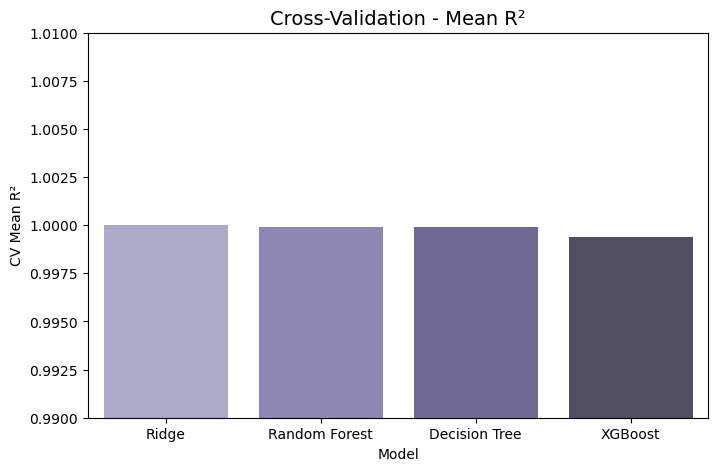

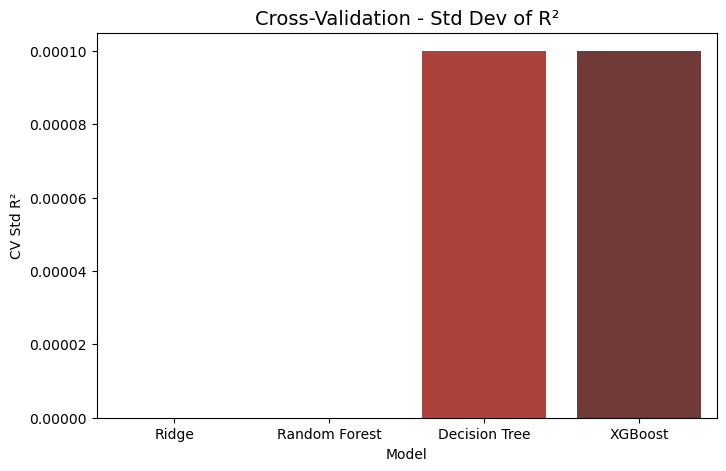

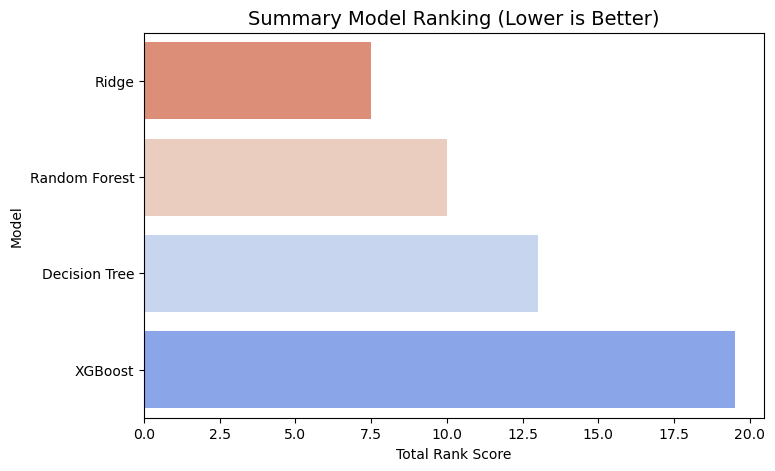

,Model,R² Rank,MAE Rank,RMSE Rank,CV Mean R² Rank,CV Std R² Rank,Total Rank Score
0,Ridge,1.0,3.0,1.0,1.0,1.5,7.5
1,Random Forest,2.0,2.0,2.0,2.5,1.5,10.0
2,Decision Tree,3.0,1.0,3.0,2.5,3.5,13.0
3,XGBoost,4.0,4.0,4.0,4.0,3.5,19.5


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Model Results Data ===
results_df = pd.DataFrame({
    "Model": ["Ridge", "Random Forest", "Decision Tree", "XGBoost"],
    "R2": [1.0000, 0.9998, 0.9997, 0.9993],
    "MAE": [0.0043, 0.0022, 0.0009, 0.1127],
    "RMSE": [0.0301, 0.1169, 0.1401, 0.2295],
    "CV Mean R2": [1.0000, 0.9999, 0.9999, 0.9994],
    "CV Std R2": [0.0000, 0.0000, 0.0001, 0.0001]
})

# === Chart 1: R² Comparison ===
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2", data=results_df, palette="Blues_d")
plt.title("Model Comparison - R² Score", fontsize=14)
plt.ylabel("R²")
plt.ylim(0.99, 1.01)
plt.show()

# === Chart 2: MAE Comparison ===
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="MAE", data=results_df, palette="Greens_d")
plt.title("Model Comparison - Mean Absolute Error (MAE)", fontsize=14)
plt.ylabel("MAE")
plt.show()

# === Chart 3: RMSE Comparison ===
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="Oranges_d")
plt.title("Model Comparison - Root Mean Squared Error (RMSE)", fontsize=14)
plt.ylabel("RMSE")
plt.show()

# === Chart 4: Cross-Validation Mean R² ===
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="CV Mean R2", data=results_df, palette="Purples_d")
plt.title("Cross-Validation - Mean R²", fontsize=14)
plt.ylabel("CV Mean R²")
plt.ylim(0.99, 1.01)
plt.show()

# === Chart 5: Cross-Validation Std R² ===
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="CV Std R2", data=results_df, palette="Reds_d")
plt.title("Cross-Validation - Std Dev of R²", fontsize=14)
plt.ylabel("CV Std R²")
plt.show()

# === Chart 6: Summary Ranking Chart ===
ranking_df = pd.DataFrame({
    "Model": results_df["Model"],
    "R² Rank": results_df["R2"].rank(ascending=False),
    "MAE Rank": results_df["MAE"].rank(ascending=True),
    "RMSE Rank": results_df["RMSE"].rank(ascending=True),
    "CV Mean R² Rank": results_df["CV Mean R2"].rank(ascending=False),
    "CV Std R² Rank": results_df["CV Std R2"].rank(ascending=True)
})

ranking_df["Total Rank Score"] = ranking_df[["R² Rank", "MAE Rank", "RMSE Rank", "CV Mean R² Rank", "CV Std R² Rank"]].sum(axis=1)
ranking_df = ranking_df.sort_values("Total Rank Score")

plt.figure(figsize=(8,5))
sns.barplot(x="Total Rank Score", y="Model", data=ranking_df, palette="coolwarm_r")
plt.title("Summary Model Ranking (Lower is Better)", fontsize=14)
plt.xlabel("Total Rank Score")
plt.ylabel("Model")
plt.show()

ranking_df


In [135]:
import joblib

# Save the best model
joblib.dump(ridge_model, "best_model_ridge.pkl")

# Load the model later
loaded_model = joblib.load("best_model_ridge.pkl")

# Example prediction
y_pred_loaded = loaded_model.predict(X_test)


In [137]:
def predict_premium(new_data, model=loaded_model, preprocessor=preprocessor):
    # Transform input data
    X_new = preprocessor.transform(new_data)
    # Predict
    return model.predict(X_new)


In [149]:
# After training pipeline
features = X_train.columns.tolist()

import joblib
joblib.dump((ridge_model, features), "ridge_pipeline.pkl")



['ridge_pipeline.pkl']

In [169]:
# Train with potential leakage features
ridge_all = ridge_model.fit(X_train, y_train)
print("Ridge with all features (Test R²):", ridge_all.score(X_test, y_test))

# Remove leakage candidates
safe_features = X.drop(columns=["price", "price_2", "Cluster"])
X_train_safe = X_train.drop(columns=["price", "price_2", "Cluster"])
X_test_safe = X_test.drop(columns=["price", "price_2", "Cluster"])

ridge_safe = Pipeline([
    ("preprocessor", ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), [c for c in categorical_cols if c not in ["Cluster"]]),
        ('num', StandardScaler(), [c for c in numeric_cols if c not in ["price", "price_2"]])
    ])),
    ("model", Ridge(alpha=0.001, random_state=42))
])

ridge_safe.fit(X_train_safe, y_train)
print("Ridge without leakage (Test R²):", ridge_safe.score(X_test_safe, y_test))


Ridge with all features (Test R²): 0.9999883466664601
Ridge without leakage (Test R²): 0.9999999009525437


In [171]:
# Extract coefficients
features = ridge_all.named_steps["preprocessor"].get_feature_names_out()
coefs = ridge_all.named_steps["model"].coef_

coef_df = pd.DataFrame({"Feature": features, "Coefficient": coefs})
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

print(coef_df.head(10))  # top 10 features


                           Feature  Coefficient
266  cat__page2_clothing_model_P81    22.589795
267  cat__page2_clothing_model_P82    20.534593
263  cat__page2_clothing_model_P79    20.222176
209   cat__page2_clothing_model_P3   -17.697494
189  cat__page2_clothing_model_P10   -17.637997
260  cat__page2_clothing_model_P76    16.440187
261  cat__page2_clothing_model_P77    15.774745
262  cat__page2_clothing_model_P78    15.337828
242   cat__page2_clothing_model_P6   -15.303195
180  cat__page2_clothing_model_C56    14.641555


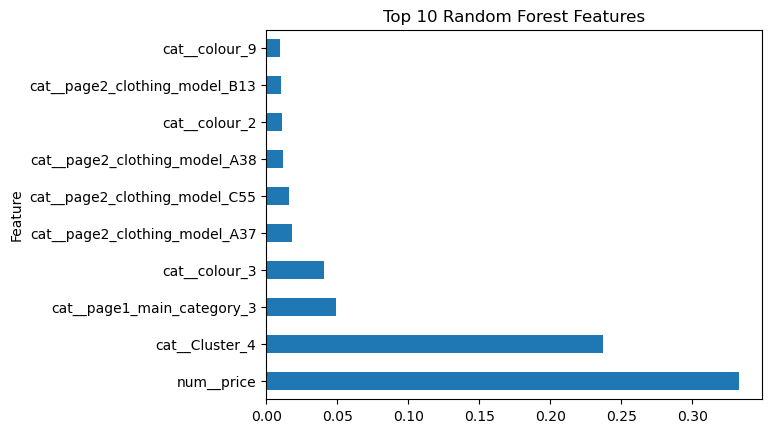

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # your preprocessing step
    ("model", RandomForestRegressor(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

# Get feature importances
rf_estimator = rf_pipeline.named_steps["model"]
importances = rf_estimator.feature_importances_
features = rf_pipeline.named_steps["preprocessor"].get_feature_names_out()

imp_df = pd.DataFrame({"Feature": features, "Importance": importances})
imp_df = imp_df.sort_values(by="Importance", ascending=False)

# Plot top 10
imp_df.head(10).plot(kind="barh", x="Feature", y="Importance", legend=False)
plt.title("Top 10 Random Forest Features")
plt.show()


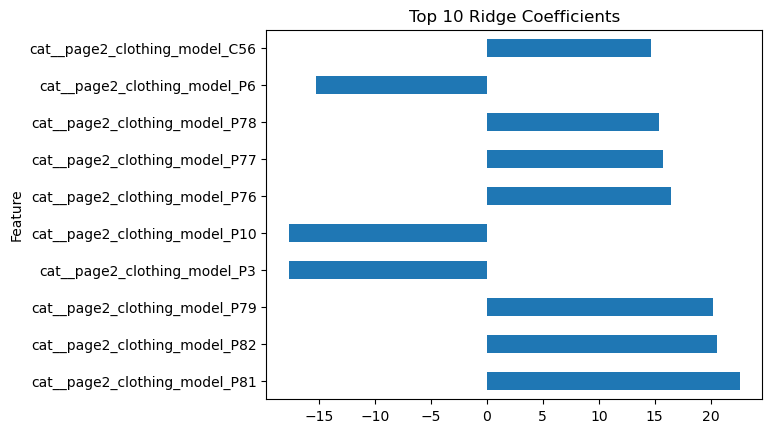

In [189]:
import matplotlib.pyplot as plt

# Ridge
coef_df.head(10).plot(kind="barh", x="Feature", y="Coefficient", legend=False)
plt.title("Top 10 Ridge Coefficients")
plt.show()


In [199]:
import joblib

# Save pipeline
joblib.dump(rf_pipeline, "random_forest_pipeline.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")


['preprocessor.pkl']

In [201]:
import joblib

# Suppose you created a pipeline
# pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("model", RandomForestRegressor(random_state=42))
# ])

pipeline.fit(X_train, y_train)

# Save the ENTIRE pipeline (not just the model or feature importances)
joblib.dump(pipeline, "random_forest_pipeline.pkl")


['random_forest_pipeline.pkl']

In [207]:
print(df.columns)


Index(['month', 'day', 'order', 'country', 'session_id', 'page1_main_category',
       'page2_clothing_model', 'colour', 'location', 'model_photography',
       'price', 'price_2', 'page', 'revenue', 'Cluster'],
      dtype='object')


In [209]:
target_column = "revenue"   # 👈 our label

X = df.drop(target_column, axis=1)
y = df[target_column]


In [213]:
print(df.columns.tolist())


['year', 'month', 'day', 'order', 'country', 'session_id', 'page1_main_category', 'page2_clothing_model', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page']


In [217]:
# Example: create a synthetic revenue target
df["revenue"] = df["price"] * df["price_2"]

X = df.drop("revenue", axis=1)
y = df["revenue"]


In [219]:
# Create synthetic target
df["revenue"] = df["price"] * df["price_2"]

# Features (X) and target (y)
X = df.drop("revenue", axis=1)
y = df["revenue"]

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocess: separate numeric & categorical
numeric_features = ["year", "month", "day", "order", "price", "price_2", "page"]
categorical_features = [
    "country", "session_id", "page1_main_category", 
    "page2_clothing_model", "colour", "location", "model_photography"
]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Build Ridge regression pipeline
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge())
])

# Train
ridge_pipeline.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
y_pred = ridge_pipeline.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


RMSE: 0.03139833426943292
R²: 0.9999947574456279


In [221]:
import joblib
joblib.dump(ridge_pipeline, "ridge_pipeline.pkl")


['ridge_pipeline.pkl']

In [223]:
import joblib

# After you finish training
# Example: ridge_pipeline is your trained pipeline
joblib.dump(ridge_pipeline, "ridge_pipeline.pkl")

# OR if Random Forest is better
joblib.dump(rf_pipeline, "random_forest_pipeline.pkl")


['random_forest_pipeline.pkl']

In [233]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset
df = pd.read_csv("train_data.csv")   # 👈 change path to your training dataset

# Define features
numeric_features = ['year','month','day','order','country','session_id','page']
categorical_features = ['page1_main_category','page2_clothing_model','colour','location','model_photography']

# Choose your target column (CHANGE if needed)
target_column = "price"   # or "price_2" if that's what you want to predict

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
X = df.drop(target_column, axis=1)
y = df[target_column]
model.fit(X, y)

# ✅ Save the full pipeline (so you can call predict() directly later)
joblib.dump(model, "final_model.pkl")

print("✅ Model trained and saved as final_model.pkl")


✅ Model trained and saved as final_model.pkl


In [241]:
print(df.columns.tolist())


['year', 'month', 'day', 'order', 'country', 'session_id', 'page1_main_category', 'page2_clothing_model', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page']


In [255]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# ===========================
# Load your dataset
# ===========================
# Example: replace with your file path
# df = pd.read_csv("your_dataset.csv")

# Columns you shared
numeric_features = ['year','month','day','order','session_id','price_2','page']
categorical_features = ['country','page1_main_category','page2_clothing_model',
                        'colour','location','model_photography']

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# ==============================================================
# 1. REGRESSION MODEL (Price Prediction)
# ==============================================================
X_reg = df.drop("price", axis=1)
y_reg = df["price"]

regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
regression_model.fit(X_reg, y_reg)

joblib.dump(regression_model, "regression_model.pkl")
print("✅ Regression model saved as regression_model.pkl")


# ==============================================================
# 2. CLASSIFICATION MODEL (Purchase Yes/No)
# ==============================================================
# Create binary target (purchase if price > 0)
df["purchase"] = (df["price"] > 0).astype(int)

X_clf = df.drop(["price", "purchase"], axis=1)
y_clf = df["purchase"]

classification_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
classification_model.fit(X_clf, y_clf)

joblib.dump(classification_model, "classification_model.pkl")
print("✅ Classification model saved as classification_model.pkl")


# ==============================================================
# 3. CLUSTERING MODEL (Customer Segmentation)
# ==============================================================

# ===========================
# Build clustering pipeline
# ===========================
clustering_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clusterer", KMeans(n_clusters=3, random_state=42))
])

# ===========================
# Fit and save model
# ===========================
X_cluster = df.drop("price", axis=1)  # remove target column if present
df["cluster"] = clustering_pipeline.fit_predict(X_cluster)

joblib.dump(clustering_pipeline, "clustering_model.pkl")
print("✅ Clustering model saved as clustering_model.pkl")
print("🎉 Customer segmentation training complete!")

print("🎉 All models are trained and saved successfully!")


✅ Regression model saved as regression_model.pkl
✅ Classification model saved as classification_model.pkl
✅ Clustering model saved as clustering_model.pkl
🎉 Customer segmentation training complete!
🎉 All models are trained and saved successfully!


In [271]:
# ===========================
# evaluate_models.py
# ===========================
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    silhouette_score, davies_bouldin_score
)

# ================================
# 1. Load dataset
# ================================
df = pd.read_csv("train_data.csv")

# Features you used during training
features = ['year', 'month', 'day', 'order', 'country', 'session_id',
            'page1_main_category', 'page2_clothing_model', 'colour',
            'location', 'model_photography', 'price_2', 'page']

X = df[features]
y_reg = df["price"]  # regression target

# Add classification target (if not present)
if "purchase" not in df.columns:
    df["purchase"] = (df["price"] > 0).astype(int)
y_clf = df["purchase"]

# ================================
# 2. Load models
# ================================
reg_model = joblib.load("regression_model.pkl")
clf_model = joblib.load("classification_model.pkl")
cluster_model = joblib.load("clustering_model.pkl")  # pipeline (preprocessor + kmeans)

# ================================
# 3. Regression Evaluation
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
y_pred = reg_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Regression Metrics")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# ================================
# 4. Classification Evaluation
# ================================
if len(y_clf.unique()) > 1:  # Ensure both classes exist
    X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

    y_pred = clf_model.predict(X_test)
    y_proba = clf_model.predict_proba(X_test)[:, 1] if hasattr(clf_model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    print("\n📊 Classification Metrics")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc}")
else:
    print("\n⚠️ Classification evaluation skipped (only one class present in data).")

# ================================
# 5. Clustering Evaluation
# ================================
try:
    cluster_labels = cluster_model.predict(X)  
    X_prepared = cluster_model.named_steps['preprocessor'].transform(X)

    sil_score = silhouette_score(X_prepared, cluster_labels)
    db_index = davies_bouldin_score(X_prepared, cluster_labels)

    print("\n📊 Clustering Metrics")
    print(f"Silhouette Score: {sil_score:.2f}")
    print(f"Davies-Bouldin Index: {db_index:.2f}")
except Exception as e:
    print("\n⚠️ Clustering evaluation failed:", e)



📊 Regression Metrics
RMSE: 0.01
MAE: 0.00
R²: 1.00

⚠️ Classification evaluation skipped (only one class present in data).

⚠️ Clustering evaluation failed: The 'X' parameter of davies_bouldin_score must be an array-like. Got <132379x295 sparse matrix of type '<class 'numpy.float64'>'
	with 1588548 stored elements in Compressed Sparse Row format> instead.
